___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 3<br><br>Regression with ANN<br><br>KC House Data<br><h1>

# Keras Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
#!pip install folium             
#!conda install folium -c conda-forge

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/kc_house_data.csv")

In [126]:
df = pd.read_csv("veriler.csv")

## Exploratory Data Analysis and Visualization

In [127]:
df.head()

,id,date,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,1,2022-01-01,10191,1,3.385,4546,17296,2.500,1,1,4,2,2256,436,2002,0,40.132,29.156,2652,12574,127538
1,2,2022-01-02,10195,4,4.858,4698,10027,3.000,1,3,5,10,1865,1785,1942,1,39.932,28.924,3446,13368,389424
2,3,2022-01-03,10134,1,2.527,4809,18237,3.000,0,1,3,8,1577,1036,1945,1,39.991,28.875,2471,2055,801606
3,4,2022-01-04,10117,5,2.508,4822,8212,1.500,1,3,5,13,1025,1507,1932,1,39.927,29.051,1271,3548,299634
4,5,2022-01-05,10136,2,2.145,2622,6346,2.000,1,4,2,4,2353,828,1920,1,39.993,29.081,4619,1684,921773


We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    int64  
 1   date           100 non-null    object 
 2   zipcode        100 non-null    int64  
 3   bedrooms       100 non-null    int64  
 4   bathrooms      100 non-null    float64
 5   sqft_living    100 non-null    int64  
 6   sqft_lot       100 non-null    int64  
 7   floors         100 non-null    float64
 8   waterfront     100 non-null    int64  
 9   view           100 non-null    int64  
 10  condition      100 non-null    int64  
 11  grade          100 non-null    int64  
 12  sqft_above     100 non-null    int64  
 13  sqft_basement  100 non-null    int64  
 14  yr_built       100 non-null    int64  
 15  yr_renovated   100 non-null    int64  
 16  lat            100 non-null    float64
 17  long           100 non-null    float64
 18  sqft_living

In [129]:
df.isnull().sum().any()

False

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.000,50.500,29.011,1.000,25.750,50.500,75.250,100.000
zipcode,100.000,10103.200,56.268,10000.000,10062.750,10101.500,10148.500,10199.000
bedrooms,100.000,2.810,1.426,1.000,1.750,3.000,4.000,5.000
bathrooms,100.000,3.140,1.102,1.102,2.217,3.184,3.980,4.984
sqft_living,100.000,2661.290,1384.430,524.000,1542.500,2497.500,3873.750,4994.000
sqft_lot,100.000,9639.840,5190.722,1153.000,5463.000,8793.500,14130.750,18906.000
floors,100.000,2.050,0.737,1.000,1.500,2.000,3.000,3.000
waterfront,100.000,0.500,0.503,0.000,0.000,0.500,1.000,1.000
view,100.000,2.050,1.381,0.000,1.000,2.000,3.000,4.000
condition,100.000,3.070,1.373,1.000,2.000,3.000,4.000,5.000


### İd_number

In [131]:
df = df.drop('id', axis = 1)

### price

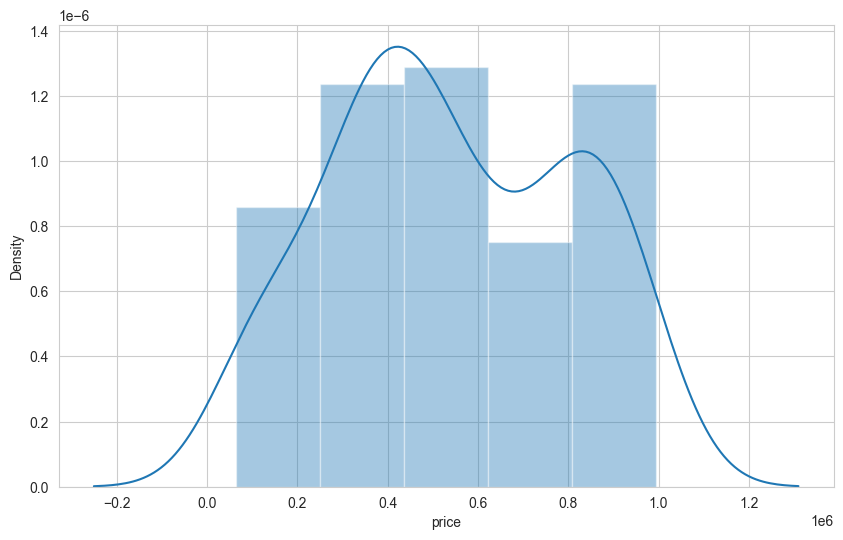

In [132]:
sns.distplot(df['price']);

In [133]:
# plt.figure(figsize = (8,10))
# df.corr(numeric_only=True)["price"].sort_values().drop("price").plot(kind = "barh");

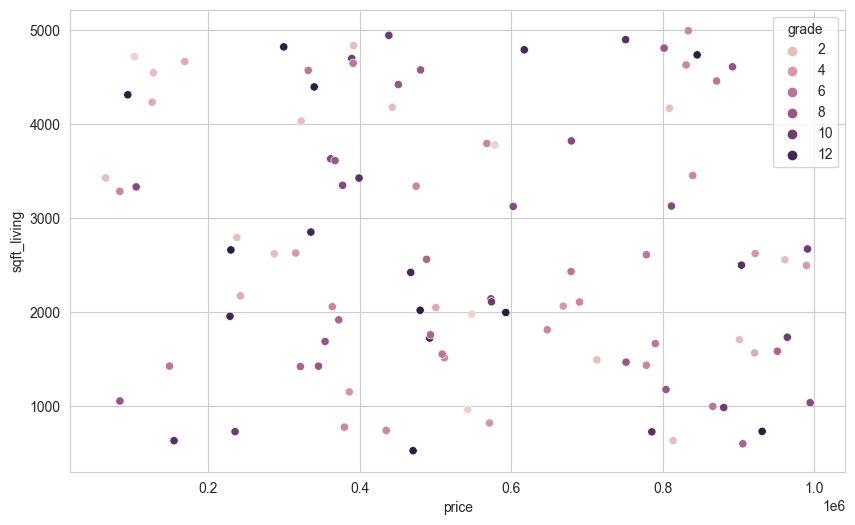

In [134]:
sns.scatterplot(x = 'price',y = 'sqft_living', data = df, hue = "grade");

### bedrooms

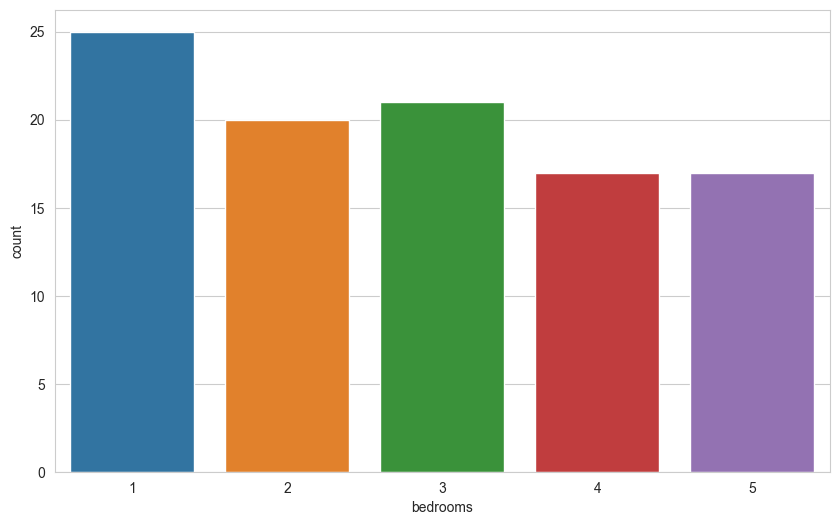

In [135]:
sns.countplot(x = df['bedrooms'])
plt.show()

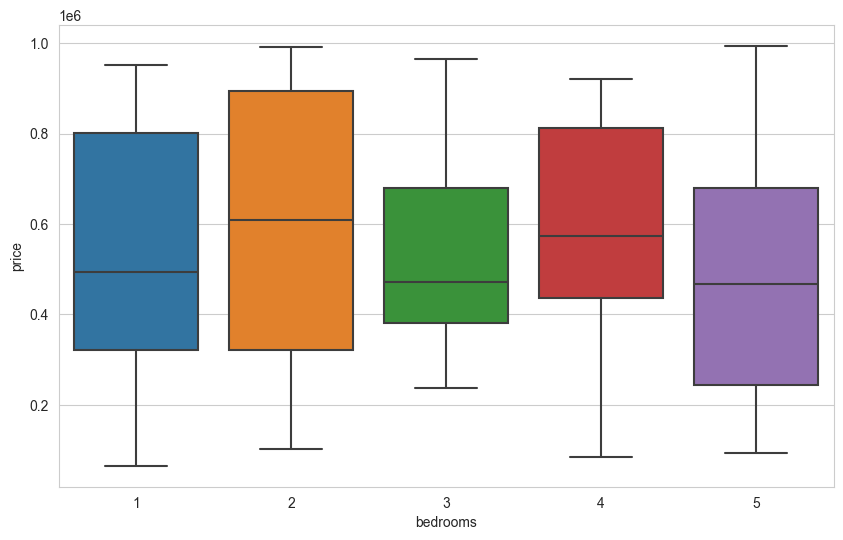

In [136]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df);

Most likely the data was entered incorrectly.

In [138]:
df.shape

(100, 20)

### date

In [139]:
df['date'].dtype

dtype('O')

In [140]:
df['date']

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
95    2022-04-06
96    2022-04-07
97    2022-04-08
98    2022-04-09
99    2022-04-10
Name: date, Length: 100, dtype: object

In [141]:
df['date'] = pd.to_datetime(df['date'])

In [142]:
df['date']

0    2022-01-01
1    2022-01-02
2    2022-01-03
3    2022-01-04
4    2022-01-05
        ...    
95   2022-04-06
96   2022-04-07
97   2022-04-08
98   2022-04-09
99   2022-04-10
Name: date, Length: 100, dtype: datetime64[ns]

In [143]:
df['year'] = df['date'].dt.year
#df['year'] = df['date'].apply(lambda date : date.year)

In [144]:
df['month'] = df['date'].dt.month

In [145]:
df.head()

,date,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,year,month
0,2022-01-01,10191,1,3.385,4546,17296,2.500,1,1,4,2,2256,436,2002,0,40.132,29.156,2652,12574,127538,2022,1
1,2022-01-02,10195,4,4.858,4698,10027,3.000,1,3,5,10,1865,1785,1942,1,39.932,28.924,3446,13368,389424,2022,1
2,2022-01-03,10134,1,2.527,4809,18237,3.000,0,1,3,8,1577,1036,1945,1,39.991,28.875,2471,2055,801606,2022,1
3,2022-01-04,10117,5,2.508,4822,8212,1.500,1,3,5,13,1025,1507,1932,1,39.927,29.051,1271,3548,299634,2022,1
4,2022-01-05,10136,2,2.145,2622,6346,2.000,1,4,2,4,2353,828,1920,1,39.993,29.081,4619,1684,921773,2022,1


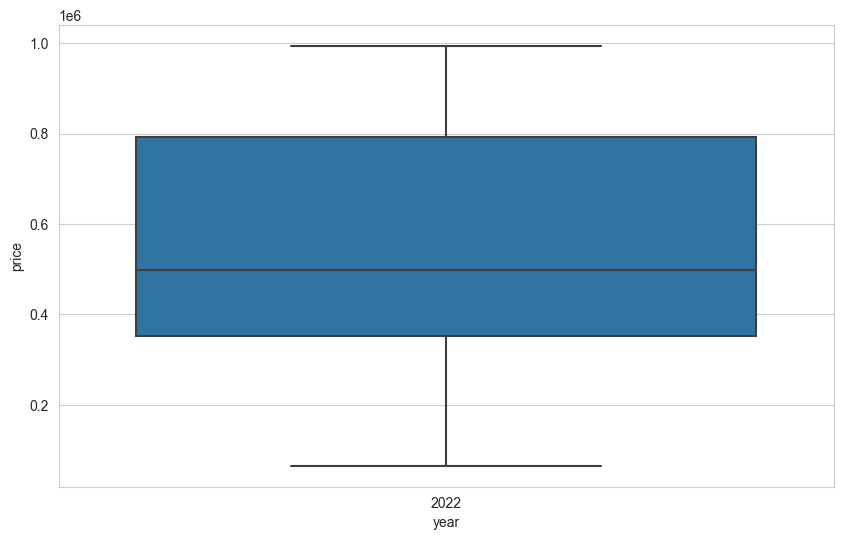

In [146]:
sns.boxplot(x = 'year', y = 'price', data = df);

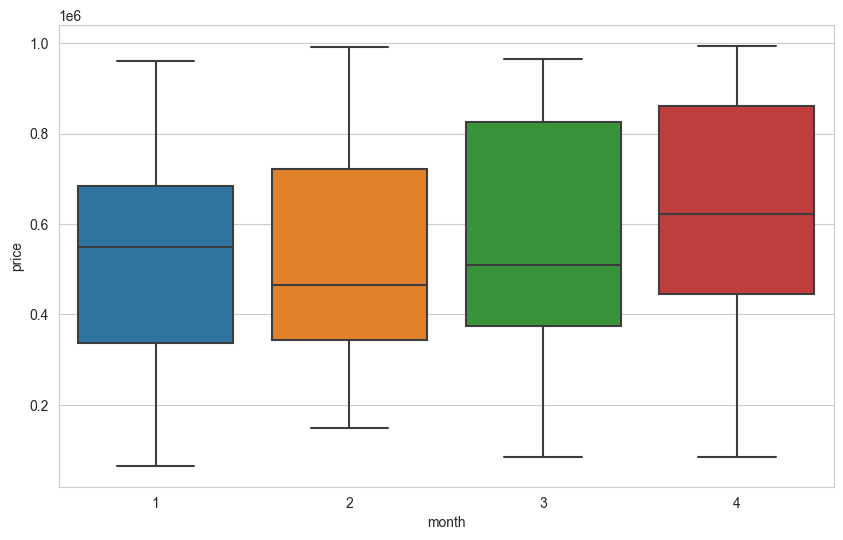

In [147]:
sns.boxplot(x = 'month', y = 'price', data = df);

In [148]:
df = df.drop(['date', "year", "month"], axis = 1)

### zipcode

In [149]:
df['zipcode'].value_counts(dropna = False)

10063    4
10067    3
10191    2
10025    2
10193    2
        ..
10043    1
10020    1
10088    1
10091    1
10056    1
Name: zipcode, Length: 84, dtype: int64

we can categorize the zipcodes as north, south, west, east, middle by regions. But it can be made manually and taken many time and we need domain knowladge to do that. So we will drop this column.


If you want to keep zipcodes, look into [hash encoding](https://medium.com/flutter-community/dealing-with-categorical-features-with-high-cardinality-feature-hashing-7c406ff867cb).

In [150]:
df = df.drop('zipcode', axis = 1)

### yr_renovated & yr_built

In [151]:
df['yr_renovated'].value_counts(dropna = False)

1    56
0    44
Name: yr_renovated, dtype: int64

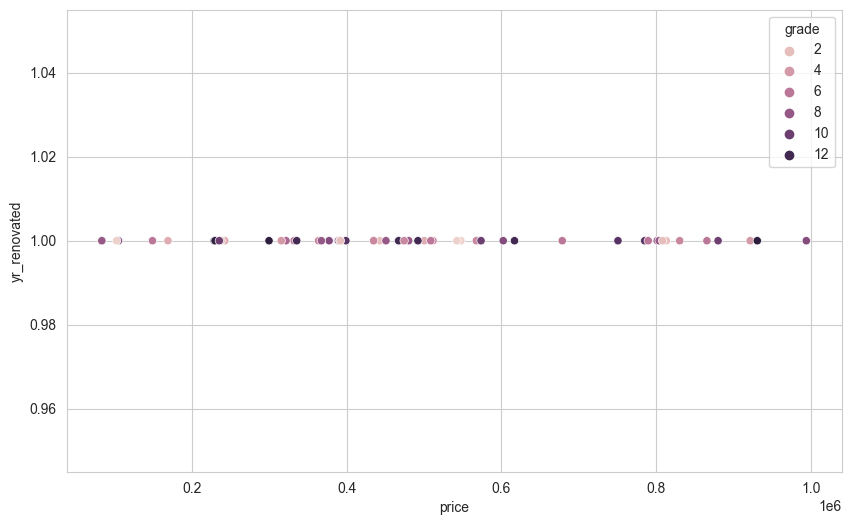

In [152]:
sns.scatterplot(x = 'price',y = 'yr_renovated', data = df[df.yr_renovated!=0], hue = "grade");

In [153]:
df['yr_built'].value_counts(dropna = False)

1932    4
1923    4
2002    3
1950    3
1979    3
       ..
1936    1
1944    1
1940    1
1976    1
1990    1
Name: yr_built, Length: 64, dtype: int64

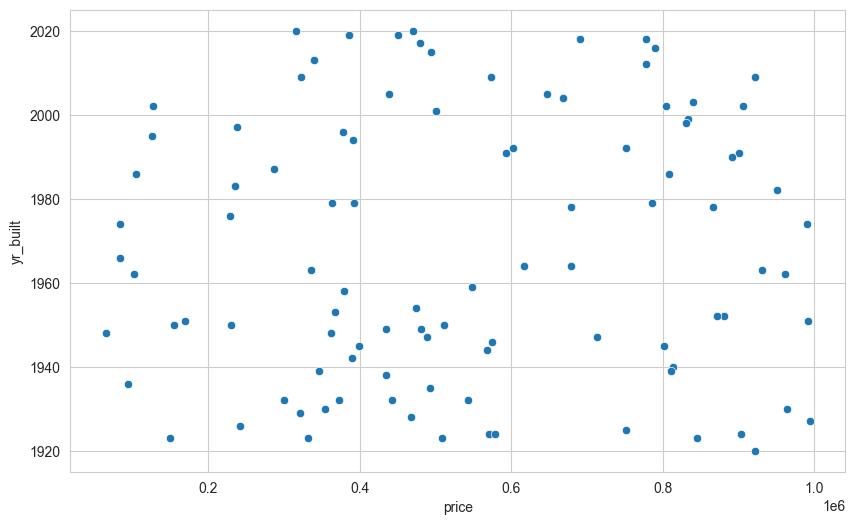

In [154]:
sns.scatterplot(x = 'price',y = 'yr_built', data = df);

In [155]:
df.yr_renovated.apply(lambda x : x if x == 0 else 1).value_counts()

1    56
0    44
Name: yr_renovated, dtype: int64

In [156]:
df["renovated"] = df.yr_renovated.apply(lambda x : x if x == 0 else 1)

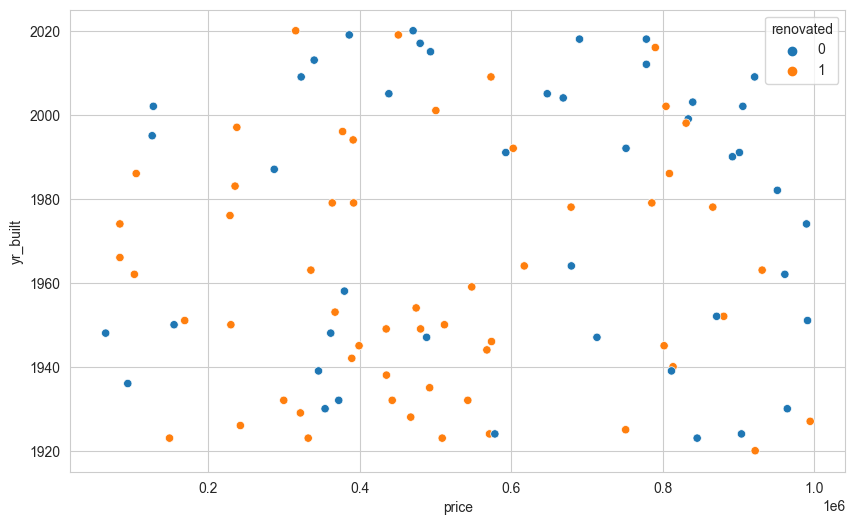

In [157]:
sns.scatterplot(x = 'price',y = 'yr_built', data = df, hue = "renovated")
plt.show()

In [158]:
df["built|renovated"] = df["yr_renovated"].replace(0, np.nan).fillna(df["yr_built"])
df["built|renovated"]

0    2002.000
1       1.000
2       1.000
3       1.000
4       1.000
       ...   
95      1.000
96   2015.000
97   1990.000
98      1.000
99      1.000
Name: built|renovated, Length: 100, dtype: float64

In [159]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,renovated,built|renovated
0,1,3.385,4546,17296,2.500,1,1,4,2,2256,436,2002,0,40.132,29.156,2652,12574,127538,0,2002.000
1,4,4.858,4698,10027,3.000,1,3,5,10,1865,1785,1942,1,39.932,28.924,3446,13368,389424,1,1.000
2,1,2.527,4809,18237,3.000,0,1,3,8,1577,1036,1945,1,39.991,28.875,2471,2055,801606,1,1.000
3,5,2.508,4822,8212,1.500,1,3,5,13,1025,1507,1932,1,39.927,29.051,1271,3548,299634,1,1.000
4,2,2.145,2622,6346,2.000,1,4,2,4,2353,828,1920,1,39.993,29.081,4619,1684,921773,1,1.000


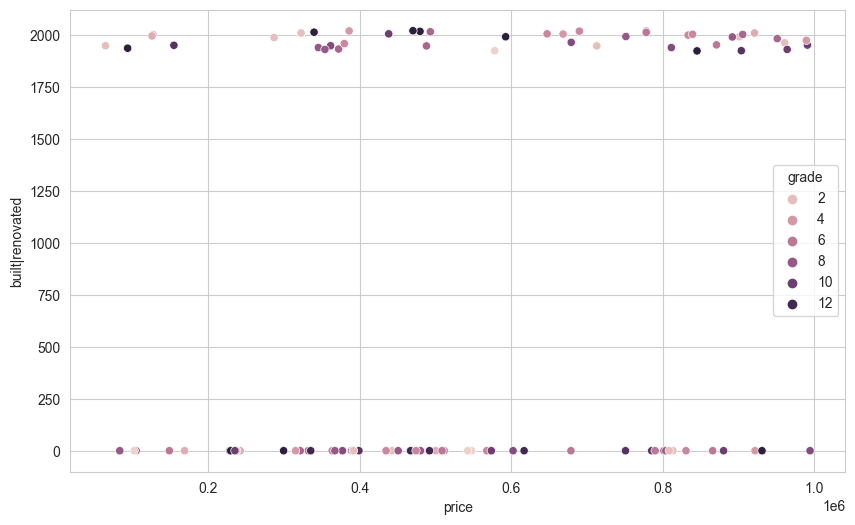

In [160]:
sns.scatterplot(x = 'price',y = 'built|renovated', data = df, hue = "grade");

In [161]:
df.drop(["yr_renovated", "yr_built", "renovated"], axis = 1, inplace = True)

### sqft_basement

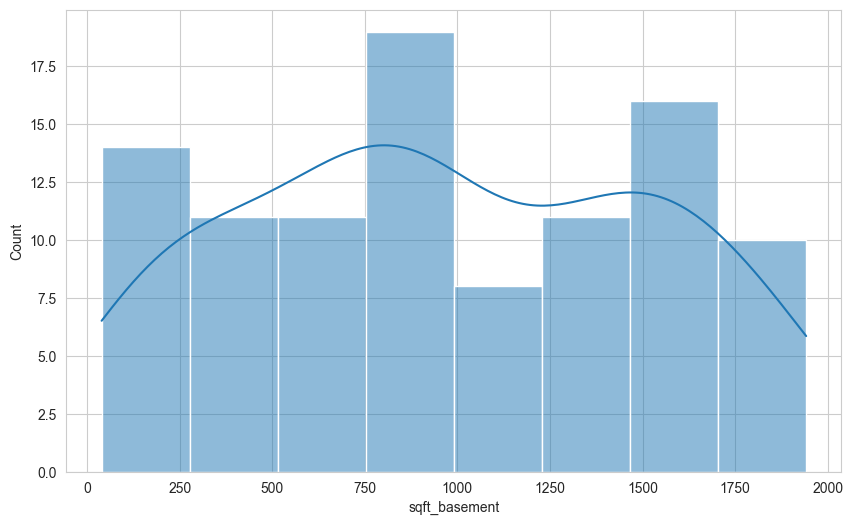

In [162]:
sns.histplot(df["sqft_basement"], kde=True)
plt.show()

In [163]:
df[df["sqft_basement"] > 3000].sort_values(by="sqft_basement", ascending=False)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,built|renovated


### sqft_above

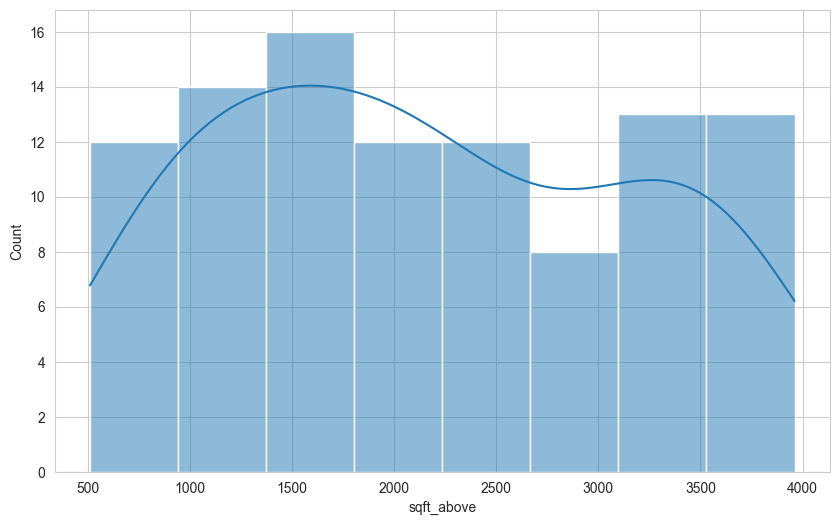

In [164]:
sns.histplot(df["sqft_above"], kde=True)
plt.show()

In [166]:
df[df["sqft_above"] > 600].sort_values(by="sqft_above", ascending=False)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,built|renovated
82,1,4.456,4836,13833,2.500,0,1,1,2,3961,1942,40.078,29.074,3298,9137,391854,1.000
66,1,4.764,4169,12166,3.000,0,1,5,2,3938,574,39.955,29.171,789,14756,808612,1.000
73,2,3.874,1811,2727,2.500,0,3,4,5,3917,655,40.192,29.156,3262,8327,647400,2005.000
77,4,2.922,1723,10980,1.000,0,4,4,12,3914,1840,40.125,29.062,2647,8117,492200,1.000
98,1,2.016,996,17612,1.500,0,0,3,6,3910,992,40.124,29.055,616,11246,865866,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,2,2.221,2671,4197,2.000,1,4,5,10,667,810,39.908,28.928,2862,8398,990902,1951.000
30,2,2.595,4572,6456,2.000,0,2,3,6,655,510,40.092,29.102,2779,10017,331921,1.000
9,2,2.112,4994,15674,2.000,0,0,3,5,622,1355,40.028,29.100,2789,7792,833510,1999.000
87,4,2.207,3612,9127,1.500,1,4,1,8,615,107,40.165,28.845,3863,4947,367337,1.000


### Geographical Properties

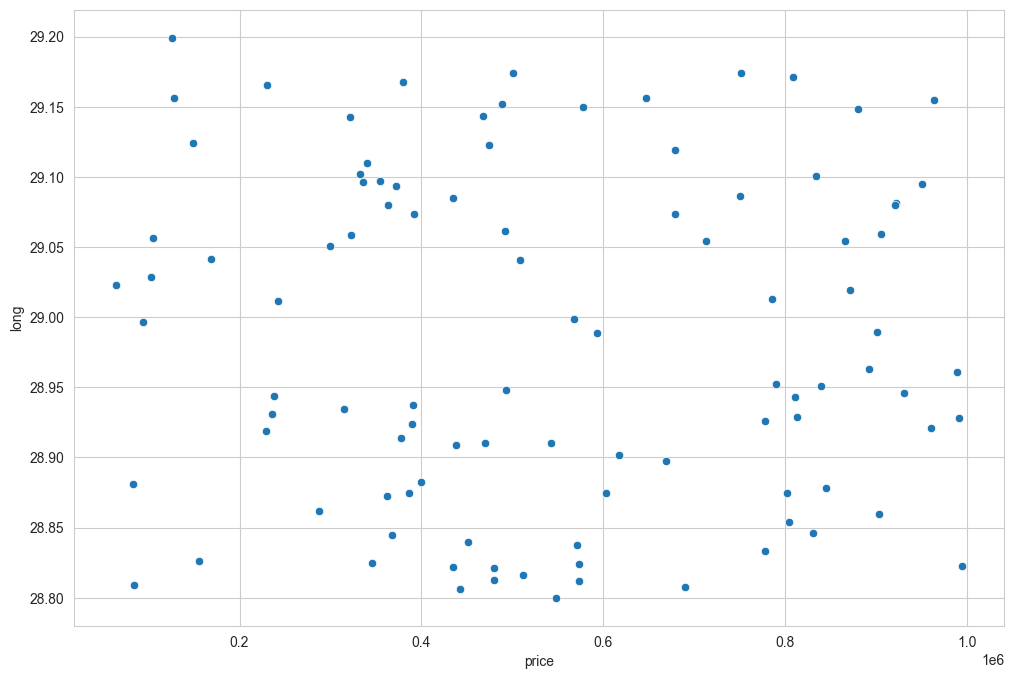

In [167]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'price', y = 'long', data = df);

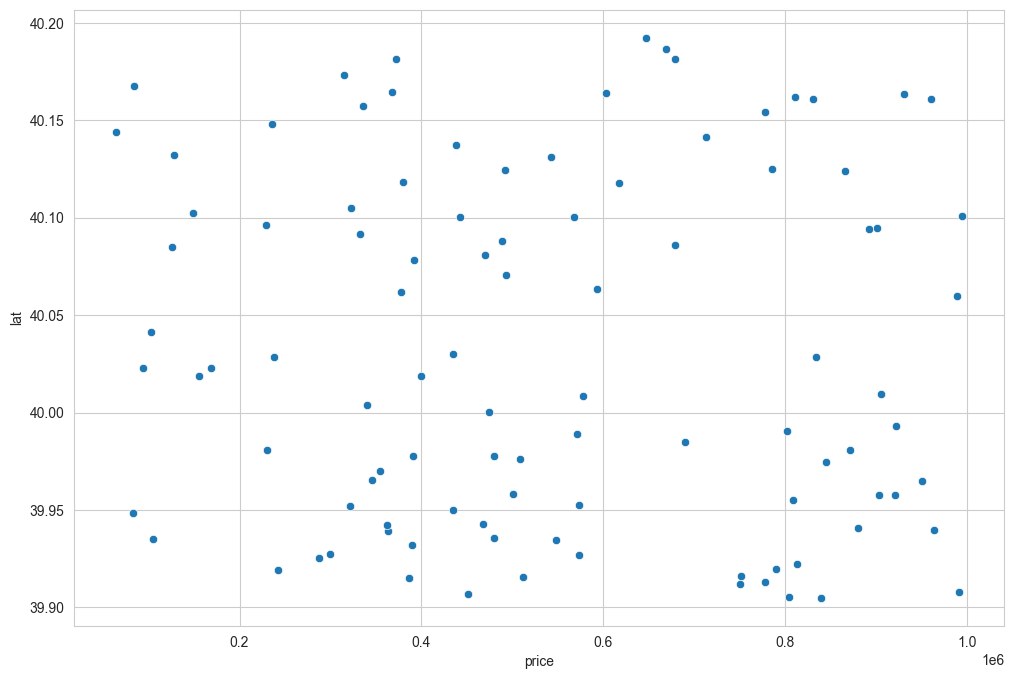

In [168]:
plt.figure(figsize  = (12, 8))
sns.scatterplot(x = 'price', y = 'lat', data = df);

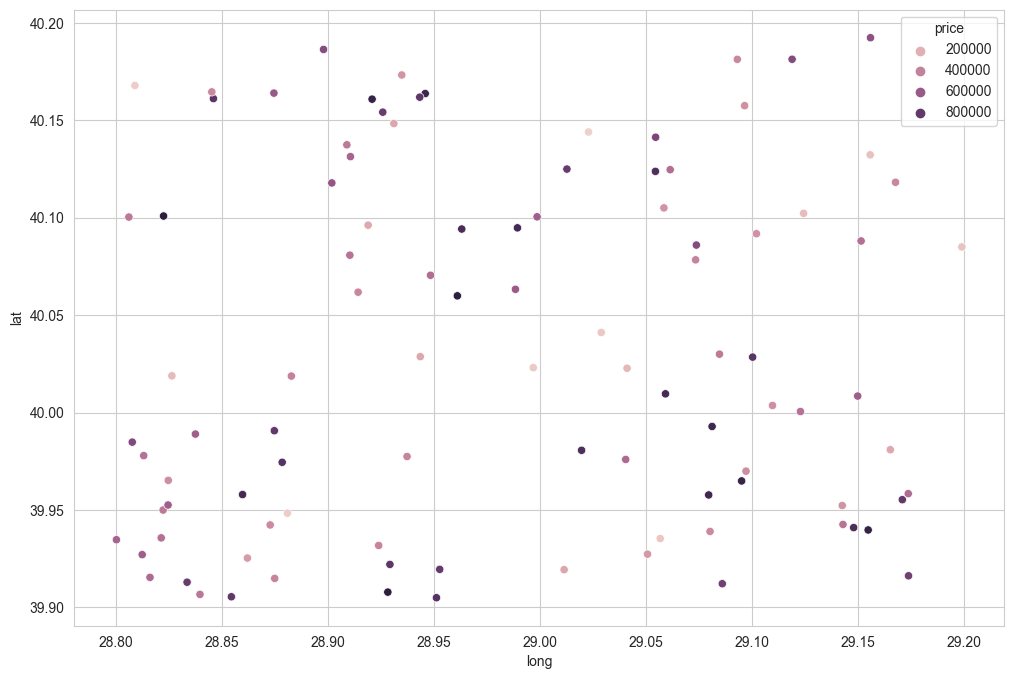

In [169]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')
plt.show()

In [170]:
len(df) * (0.01)

1.0

In [171]:
df.sort_values('price', ascending = False).head(216)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,built|renovated
93,5,1.352,1035,12727,2.000,1,2,1,9,1786,1681,40.101,28.822,3450,8763,994398,1.000
31,2,2.221,2671,4197,2.000,1,4,5,10,667,810,39.908,28.928,2862,8398,990902,1951.000
39,2,4.595,2496,7011,1.000,0,1,5,4,2600,501,40.060,28.961,2021,12740,989527,1974.000
79,3,1.350,1732,14166,2.000,0,1,2,10,3145,104,39.940,29.155,3806,19408,964206,1930.000
23,2,2.864,2556,9706,1.000,0,2,5,2,2061,60,40.161,28.921,1319,8443,960948,1962.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,3.977,4717,16286,1.500,0,2,5,1,1398,1365,40.041,29.029,4830,14904,102512,1.000
7,5,3.360,4312,15001,3.000,1,4,4,13,2831,1270,40.023,28.997,3583,19932,93796,1936.000
91,1,3.801,1053,8124,1.500,0,3,5,8,2739,1342,40.168,28.809,1575,5861,83443,1.000
78,4,4.101,3285,6338,1.000,1,4,3,5,2254,896,39.948,28.881,834,17110,83364,1.000


In [176]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

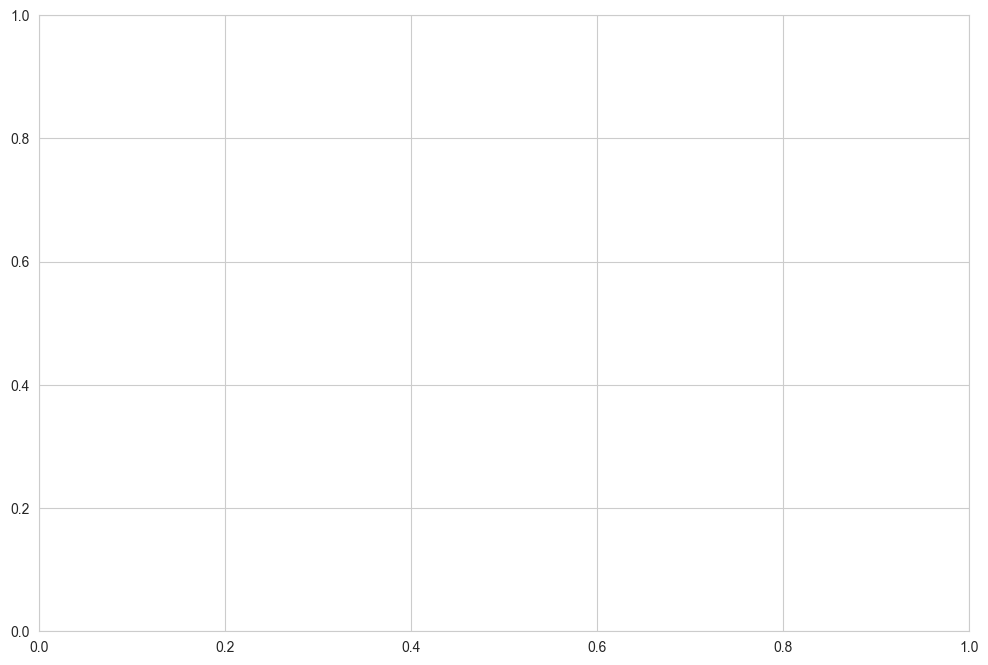

In [177]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price',
                palette = 'RdYlGn', edgecolor = None, alpha = 0.2);

In [174]:
import folium
import branca.colormap as cm

In [178]:
folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start=10)

In [123]:



places = [
    {"name": "Bursa Kent Müzesi", "location": [40.184921, 29.067678]},
    {"name": "Bursa Ulu Camii", "location": [40.191932, 29.063797]},
    {"name": "Yeşil Türbe", "location": [40.193873, 29.062608]},
    {"name": "Cumalıkızık Köyü", "location": [40.206116, 29.251551]},
    {"name": "Uludağ Milli Parkı", "location": [40.152821, 29.425215]},
]


map = folium.Map(location=[40.1833, 29.0667], zoom_start=11)


for place in places:
    folium.Marker(location=place["location"], popup=place["name"]).add_to(map)


map


In [179]:
step_1 = df.price.min()
step_2 = df.price.quantile(0.25)
step_3 = df.price.quantile(0.50)
step_4 = df.price.quantile(0.75)
step_5 = df.price.max()

In [180]:
m = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start = 10)
colormap = cm.StepColormap(
                        colors=["red","orange","yellow","green"] ,
                        index=[step_1, step_2, step_3, step_4, step_5],
                        vmin=step_1,
                        vmax=step_5)


for loc, p in zip(zip(df['lat'], df['long']),df["price"]):
      folium.Circle(
      location=loc,
      radius=1,
      fill=True, 
      color=colormap(p)
      ).add_to(m)
m

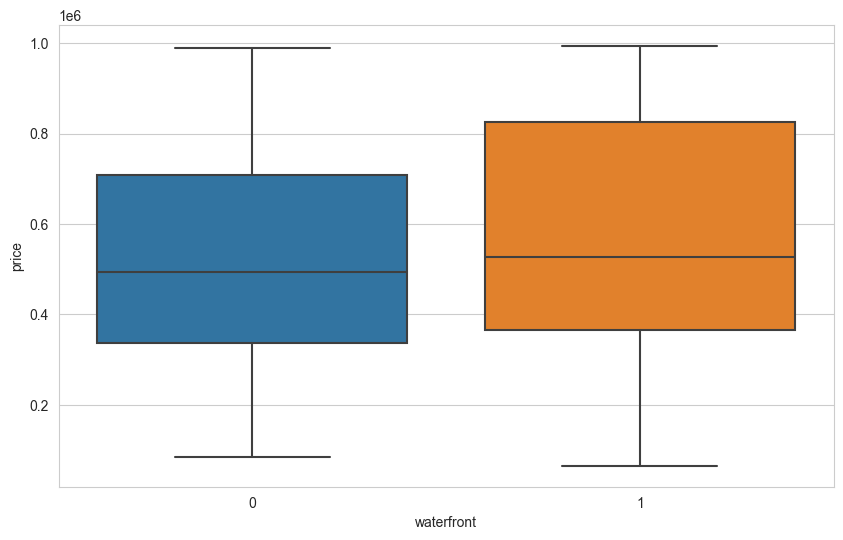

In [181]:
sns.boxplot(x = 'waterfront', y = 'price', data = df);

In [182]:
df.groupby("waterfront").price.mean()

waterfront
0   519440.180
1   563425.760
Name: price, dtype: float64

### latest data

In [183]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,built|renovated
0,1,3.385,4546,17296,2.500,1,1,4,2,2256,436,40.132,29.156,2652,12574,127538,2002.000
1,4,4.858,4698,10027,3.000,1,3,5,10,1865,1785,39.932,28.924,3446,13368,389424,1.000
2,1,2.527,4809,18237,3.000,0,1,3,8,1577,1036,39.991,28.875,2471,2055,801606,1.000
3,5,2.508,4822,8212,1.500,1,3,5,13,1025,1507,39.927,29.051,1271,3548,299634,1.000
4,2,2.145,2622,6346,2.000,1,4,2,4,2353,828,39.993,29.081,4619,1684,921773,1.000


In [184]:
df.shape

(100, 17)

## Preprocessing of Data
- Train | Test Split, Scalling

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X = df.drop('price', axis = 1)
y = df['price']

In [187]:
seed = 101

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [189]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

In [190]:
scaler = MinMaxScaler()

In [191]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [192]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Activation

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [194]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = mean_squared_error(actual, pred,squared=False)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [195]:
X_train.shape

(90, 16)

In [196]:
tf.keras.utils.set_random_seed(seed) 

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))



model.compile(optimizer="adam", loss="mse")

In [197]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 24)                408       
                                                                 
 dense_26 (Dense)            (None, 24)                600       
                                                                 
 dense_27 (Dense)            (None, 12)                300       
                                                                 
 dense_28 (Dense)            (None, 6)                 78        
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.weights

[<tf.Variable 'dense_25/kernel:0' shape=(16, 24) dtype=float32, numpy=
 array([[-0.35647073,  0.38490498, -0.08744469,  0.15377373,  0.22215843,
         -0.02771163,  0.11982757, -0.35179138, -0.22738509, -0.01394773,
          0.37500745,  0.17092556, -0.33209184,  0.32572126,  0.04000178,
          0.28462964, -0.04399332,  0.19303006,  0.24007684, -0.07156605,
         -0.07338411, -0.26527756, -0.10138947, -0.12765884],
        [ 0.20285243,  0.1625874 ,  0.09493753,  0.210621  , -0.3477749 ,
          0.04268652,  0.24083078, -0.3537471 , -0.37514928,  0.31485617,
         -0.10756519,  0.02557248,  0.0060361 ,  0.10938206, -0.04046023,
          0.38605756,  0.05352944,  0.2004916 ,  0.16421968, -0.09854421,
          0.27363658,  0.14958262, -0.26525187, -0.17038073],
        [-0.14781646,  0.22237402, -0.25978014, -0.08758965, -0.01525185,
         -0.27800336,  0.36590946, -0.04418713,  0.21475899, -0.20625347,
         -0.21336366, -0.06695104, -0.19746223, -0.03350914,  0.2

In [199]:
X_train.shape

(90, 16)

In [200]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 359902511104.0000 - val_loss: 404018921472.0000
Epoch 2/100
1/1 [==============================] - 0s 88ms/step - loss: 359902511104.0000 - val_loss: 404018921472.0000
Epoch 3/100
1/1 [==============================] - 0s 87ms/step - loss: 359902478336.0000 - val_loss: 404018921472.0000
Epoch 4/100
1/1 [==============================] - 0s 81ms/step - loss: 359902478336.0000 - val_loss: 404018921472.0000
Epoch 5/100
1/1 [==============================] - 0s 91ms/step - loss: 359902478336.0000 - val_loss: 404018921472.0000
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 359902412800.0000 - val_loss: 404018855936.0000
Epoch 7/100
1/1 [==============================] - 0s 81ms/step - loss: 359902412800.0000 - val_loss: 404018855936.0000
Epoch 8/100
1/1 [==============================] - 0s 78ms/step - loss: 359902412800.0000 - val_loss: 404018790400.0000
Epoch 9/100
1/1 [=========================

Epoch 69/100
1/1 [==============================] - 0s 56ms/step - loss: 359895957504.0000 - val_loss: 404011024384.0000
Epoch 70/100
1/1 [==============================] - 0s 69ms/step - loss: 359895629824.0000 - val_loss: 404010598400.0000
Epoch 71/100
1/1 [==============================] - 0s 102ms/step - loss: 359895269376.0000 - val_loss: 404010205184.0000
Epoch 72/100
1/1 [==============================] - 0s 77ms/step - loss: 359894876160.0000 - val_loss: 404009746432.0000
Epoch 73/100
1/1 [==============================] - 0s 52ms/step - loss: 359894482944.0000 - val_loss: 404009287680.0000
Epoch 74/100
1/1 [==============================] - 0s 59ms/step - loss: 359894089728.0000 - val_loss: 404008763392.0000
Epoch 75/100
1/1 [==============================] - 0s 58ms/step - loss: 359893696512.0000 - val_loss: 404008239104.0000
Epoch 76/100
1/1 [==============================] - 0s 90ms/step - loss: 359893204992.0000 - val_loss: 404007714816.0000
Epoch 77/100
1/1 [=============

In [78]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(16, 24) dtype=float32, numpy=
 array([[-5.24186254e-01,  2.23590493e-01,  5.79645813e-01,
          2.45710254e-01, -4.36569870e-01, -2.77116299e-02,
         -1.05791323e-01, -6.40888155e-01, -4.02512759e-01,
         -2.93764561e-01, -4.24774848e-02, -2.15545475e-01,
         -2.09058809e+00, -3.25055793e-02, -2.97444612e-01,
         -1.07843272e-01, -4.39933240e-02, -1.81949764e-01,
         -5.64368010e-01, -1.61240911e+00, -7.47319818e-01,
          1.25987387e+00, -3.09086800e-01, -1.74832582e-01],
        [ 9.61761594e-01,  8.46465945e-01,  3.85656893e-01,
          9.26095784e-01,  2.13706756e+00,  4.26865220e-02,
          9.48381126e-01,  3.45535368e-01,  4.38180685e-01,
          1.04560721e+00,  1.78609240e+00,  1.62254679e+00,
          1.44805896e+00,  5.75079262e-01,  5.64735174e-01,
          6.82227433e-01,  5.35294414e-02,  2.00941011e-01,
          2.06564045e+00,  2.23616862e+00,  2.19135880e+00,
          9.56493616e-01,  4.64

In [79]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,428607209472.000,423966932992.000
1,427920916480.000,421725831168.000
2,419527622656.000,403137527808.000
3,379123204096.000,335301672960.000
4,275292160000.000,204272713728.000
...,...,...
995,20043661312.000,23499087872.000
996,19976605696.000,23930720256.000
997,20008093696.000,23585560576.000
998,19941572608.000,23591962624.000


<AxesSubplot:>

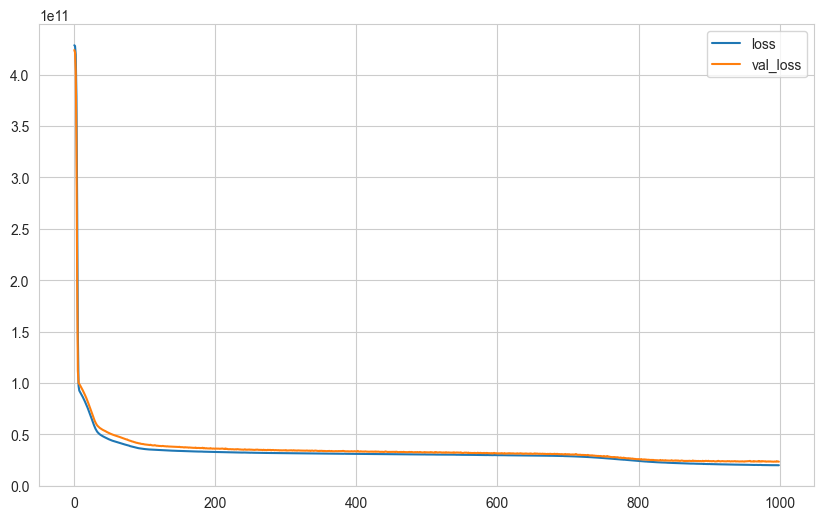

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
model.evaluate(X_test, y_test, verbose=0)

18993473536.0

In [82]:
y_pred = model.predict(X_test)

68/68 [==============================] - 0s 2ms/step


In [83]:
eval_metric(y_test, y_pred)

r2_score: 0.8521676333834103 
mae: 82004.43989076967 
mse: 18993467269.504215 
rmse: 137816.78877953955


### learning_rate

In [84]:
from tensorflow.keras.optimizers import Adam

In [85]:
tf.keras.utils.set_random_seed(seed) 

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.002) # default learning rate value is 0.001


model.compile(optimizer = opt, loss = 'mse')

In [86]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(16, 24) dtype=float32, numpy=
 array([[-0.35647073,  0.38490498, -0.08744469,  0.15377373,  0.22215843,
         -0.02771163,  0.11982757, -0.35179138, -0.22738509, -0.01394773,
          0.37500745,  0.17092556, -0.33209184,  0.32572126,  0.04000178,
          0.28462964, -0.04399332,  0.19303006,  0.24007684, -0.07156605,
         -0.07338411, -0.26527756, -0.10138947, -0.12765884],
        [ 0.20285243,  0.1625874 ,  0.09493753,  0.210621  , -0.3477749 ,
          0.04268652,  0.24083078, -0.3537471 , -0.37514928,  0.31485617,
         -0.10756519,  0.02557248,  0.0060361 ,  0.10938206, -0.04046023,
          0.38605756,  0.05352944,  0.2004916 ,  0.16421968, -0.09854421,
          0.27363658,  0.14958262, -0.26525187, -0.17038073],
        [-0.14781646,  0.22237402, -0.25978014, -0.08758965, -0.01525185,
         -0.27800336,  0.36590946, -0.04418713,  0.21475899, -0.20625347,
         -0.21336366, -0.06695104, -0.19746223, -0.03350914,  0.27

In [87]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
130/130 [==============================] - 4s 7ms/step - loss: 428607209472.0000 - val_loss: 423966932992.0000
Epoch 2/1000
130/130 [==============================] - 1s 6ms/step - loss: 427920916480.0000 - val_loss: 421725831168.0000
Epoch 3/1000
130/130 [==============================] - 1s 6ms/step - loss: 419527622656.0000 - val_loss: 403137527808.0000
Epoch 4/1000
130/130 [==============================] - 1s 6ms/step - loss: 379123204096.0000 - val_loss: 335301672960.0000
Epoch 5/1000
130/130 [==============================] - 1s 4ms/step - loss: 275292160000.0000 - val_loss: 204272713728.0000
Epoch 6/1000
130/130 [==============================] - 1s 11ms/step - loss: 147549601792.0000 - val_loss: 111843483648.0000
Epoch 7/1000
130/130 [==============================] - 1s 7ms/step - loss: 97283997696.0000 - val_loss: 100163756032.0000
Epoch 8/1000
130/130 [==============================] - 1s 5ms/step - loss: 92646809600.0000 - val_loss: 99083345920.0000
Epoch 9/10

130/130 [==============================] - 1s 4ms/step - loss: 41341976576.0000 - val_loss: 47034003456.0000
Epoch 68/1000
130/130 [==============================] - 1s 5ms/step - loss: 41104781312.0000 - val_loss: 46795587584.0000
Epoch 69/1000
130/130 [==============================] - 0s 4ms/step - loss: 40915271680.0000 - val_loss: 46542974976.0000
Epoch 70/1000
130/130 [==============================] - 1s 4ms/step - loss: 40704012288.0000 - val_loss: 46320803840.0000
Epoch 71/1000
130/130 [==============================] - 1s 4ms/step - loss: 40529031168.0000 - val_loss: 46160281600.0000
Epoch 72/1000
130/130 [==============================] - 1s 6ms/step - loss: 40288161792.0000 - val_loss: 45779673088.0000
Epoch 73/1000
130/130 [==============================] - 0s 3ms/step - loss: 40076247040.0000 - val_loss: 45556875264.0000
Epoch 74/1000
130/130 [==============================] - 0s 3ms/step - loss: 39881752576.0000 - val_loss: 45318733824.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 0s 3ms/step - loss: 34352097280.0000 - val_loss: 38399635456.0000
Epoch 134/1000
130/130 [==============================] - 0s 3ms/step - loss: 34378493952.0000 - val_loss: 38238531584.0000
Epoch 135/1000
130/130 [==============================] - 0s 3ms/step - loss: 34290659328.0000 - val_loss: 38204616704.0000
Epoch 136/1000
130/130 [==============================] - 0s 3ms/step - loss: 34242594816.0000 - val_loss: 38070075392.0000
Epoch 137/1000
130/130 [==============================] - 0s 3ms/step - loss: 34236768256.0000 - val_loss: 38116286464.0000
Epoch 138/1000
130/130 [==============================] - 0s 4ms/step - loss: 34194155520.0000 - val_loss: 38177853440.0000
Epoch 139/1000
130/130 [==============================] - 1s 4ms/step - loss: 34182680576.0000 - val_loss: 37991890944.0000
Epoch 140/1000
130/130 [==============================] - 1s 5ms/step - loss: 34143023104.0000 - val_loss: 37973917696.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 32953004032.0000 - val_loss: 36174417920.0000
Epoch 200/1000
130/130 [==============================] - 0s 3ms/step - loss: 32902148096.0000 - val_loss: 36062023680.0000
Epoch 201/1000
130/130 [==============================] - 0s 3ms/step - loss: 32931852288.0000 - val_loss: 36208545792.0000
Epoch 202/1000
130/130 [==============================] - 0s 3ms/step - loss: 32872605696.0000 - val_loss: 36158615552.0000
Epoch 203/1000
130/130 [==============================] - 1s 4ms/step - loss: 32843966464.0000 - val_loss: 36020338688.0000
Epoch 204/1000
130/130 [==============================] - 1s 4ms/step - loss: 32823848960.0000 - val_loss: 36117692416.0000
Epoch 205/1000
130/130 [==============================] - 1s 4ms/step - loss: 32821999616.0000 - val_loss: 36134940672.0000
Epoch 206/1000
130/130 [==============================] - 1s 4ms/step - loss: 32804417536.0000 - val_loss: 36133191680.0000
Epoch 207/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 32005189632.0000 - val_loss: 34824355840.0000
Epoch 266/1000
130/130 [==============================] - 1s 4ms/step - loss: 32002701312.0000 - val_loss: 34831196160.0000
Epoch 267/1000
130/130 [==============================] - 1s 4ms/step - loss: 32017553408.0000 - val_loss: 34906865664.0000
Epoch 268/1000
130/130 [==============================] - 1s 4ms/step - loss: 31989792768.0000 - val_loss: 34655289344.0000
Epoch 269/1000
130/130 [==============================] - 1s 4ms/step - loss: 31977709568.0000 - val_loss: 35034447872.0000
Epoch 270/1000
130/130 [==============================] - 1s 4ms/step - loss: 31991777280.0000 - val_loss: 34929483776.0000
Epoch 271/1000
130/130 [==============================] - 1s 4ms/step - loss: 31946887168.0000 - val_loss: 34686455808.0000
Epoch 272/1000
130/130 [==============================] - 1s 4ms/step - loss: 31964196864.0000 - val_loss: 34862141440.0000
Epoch 273/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 31490027520.0000 - val_loss: 34304614400.0000
Epoch 332/1000
130/130 [==============================] - 1s 4ms/step - loss: 31492474880.0000 - val_loss: 34125772800.0000
Epoch 333/1000
130/130 [==============================] - 1s 4ms/step - loss: 31489361920.0000 - val_loss: 34094161920.0000
Epoch 334/1000
130/130 [==============================] - 1s 5ms/step - loss: 31478507520.0000 - val_loss: 34104760320.0000
Epoch 335/1000
130/130 [==============================] - 1s 4ms/step - loss: 31460470784.0000 - val_loss: 34216122368.0000
Epoch 336/1000
130/130 [==============================] - 1s 4ms/step - loss: 31437979648.0000 - val_loss: 33894283264.0000
Epoch 337/1000
130/130 [==============================] - 1s 4ms/step - loss: 31473711104.0000 - val_loss: 34091354112.0000
Epoch 338/1000
130/130 [==============================] - 1s 4ms/step - loss: 31418583040.0000 - val_loss: 34283470848.0000
Epoch 339/1000
130/130 

130/130 [==============================] - 1s 5ms/step - loss: 31034570752.0000 - val_loss: 33508870144.0000
Epoch 398/1000
130/130 [==============================] - 1s 4ms/step - loss: 31045822464.0000 - val_loss: 33512865792.0000
Epoch 399/1000
130/130 [==============================] - 1s 4ms/step - loss: 31072184320.0000 - val_loss: 33639092224.0000
Epoch 400/1000
130/130 [==============================] - 1s 4ms/step - loss: 31079669760.0000 - val_loss: 33430771712.0000
Epoch 401/1000
130/130 [==============================] - 1s 4ms/step - loss: 31029393408.0000 - val_loss: 33422397440.0000
Epoch 402/1000
130/130 [==============================] - 1s 4ms/step - loss: 31021938688.0000 - val_loss: 33364350976.0000
Epoch 403/1000
130/130 [==============================] - 1s 4ms/step - loss: 30991849472.0000 - val_loss: 33931526144.0000
Epoch 404/1000
130/130 [==============================] - 1s 4ms/step - loss: 31022583808.0000 - val_loss: 33389436928.0000
Epoch 405/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 30652239872.0000 - val_loss: 32876361728.0000
Epoch 464/1000
130/130 [==============================] - 1s 4ms/step - loss: 30620882944.0000 - val_loss: 32913813504.0000
Epoch 465/1000
130/130 [==============================] - 1s 4ms/step - loss: 30626910208.0000 - val_loss: 32912781312.0000
Epoch 466/1000
130/130 [==============================] - 1s 4ms/step - loss: 30615638016.0000 - val_loss: 32709068800.0000
Epoch 467/1000
130/130 [==============================] - 0s 3ms/step - loss: 30634928128.0000 - val_loss: 32915165184.0000
Epoch 468/1000
130/130 [==============================] - 0s 3ms/step - loss: 30611564544.0000 - val_loss: 33038454784.0000
Epoch 469/1000
130/130 [==============================] - 1s 4ms/step - loss: 30627809280.0000 - val_loss: 32735541248.0000
Epoch 470/1000
130/130 [==============================] - 0s 3ms/step - loss: 30592423936.0000 - val_loss: 32829188096.0000
Epoch 471/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 30253398016.0000 - val_loss: 32339965952.0000
Epoch 530/1000
130/130 [==============================] - 0s 4ms/step - loss: 30248396800.0000 - val_loss: 32379459584.0000
Epoch 531/1000
130/130 [==============================] - 0s 3ms/step - loss: 30244157440.0000 - val_loss: 32270176256.0000
Epoch 532/1000
130/130 [==============================] - 0s 3ms/step - loss: 30229747712.0000 - val_loss: 32480296960.0000
Epoch 533/1000
130/130 [==============================] - 0s 3ms/step - loss: 30244550656.0000 - val_loss: 32289605632.0000
Epoch 534/1000
130/130 [==============================] - 1s 4ms/step - loss: 30221004800.0000 - val_loss: 32216489984.0000
Epoch 535/1000
130/130 [==============================] - 1s 4ms/step - loss: 30223769600.0000 - val_loss: 32334735360.0000
Epoch 536/1000
130/130 [==============================] - 1s 4ms/step - loss: 30231121920.0000 - val_loss: 32188489728.0000
Epoch 537/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 29826983936.0000 - val_loss: 31547949056.0000
Epoch 596/1000
130/130 [==============================] - 0s 3ms/step - loss: 29789052928.0000 - val_loss: 31996334080.0000
Epoch 597/1000
130/130 [==============================] - 0s 4ms/step - loss: 29856241664.0000 - val_loss: 31779119104.0000
Epoch 598/1000
130/130 [==============================] - 1s 4ms/step - loss: 29812461568.0000 - val_loss: 31610064896.0000
Epoch 599/1000
130/130 [==============================] - 0s 4ms/step - loss: 29777532928.0000 - val_loss: 31678271488.0000
Epoch 600/1000
130/130 [==============================] - 1s 4ms/step - loss: 29785346048.0000 - val_loss: 31630182400.0000
Epoch 601/1000
130/130 [==============================] - 1s 4ms/step - loss: 29765376000.0000 - val_loss: 31619047424.0000
Epoch 602/1000
130/130 [==============================] - 0s 4ms/step - loss: 29768603648.0000 - val_loss: 31438405632.0000
Epoch 603/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 29348986880.0000 - val_loss: 31254988800.0000
Epoch 662/1000
130/130 [==============================] - 1s 4ms/step - loss: 29344921600.0000 - val_loss: 31110406144.0000
Epoch 663/1000
130/130 [==============================] - 1s 4ms/step - loss: 29318979584.0000 - val_loss: 31059437568.0000
Epoch 664/1000
130/130 [==============================] - 1s 4ms/step - loss: 29314863104.0000 - val_loss: 31046238208.0000
Epoch 665/1000
130/130 [==============================] - 0s 4ms/step - loss: 29280747520.0000 - val_loss: 31230615552.0000
Epoch 666/1000
130/130 [==============================] - 1s 4ms/step - loss: 29340114944.0000 - val_loss: 31061442560.0000
Epoch 667/1000
130/130 [==============================] - 1s 4ms/step - loss: 29302728704.0000 - val_loss: 30937352192.0000
Epoch 668/1000
130/130 [==============================] - 1s 4ms/step - loss: 29292660736.0000 - val_loss: 31114760192.0000
Epoch 669/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 28009181184.0000 - val_loss: 29705531392.0000
Epoch 728/1000
130/130 [==============================] - 1s 4ms/step - loss: 28003330048.0000 - val_loss: 29834829824.0000
Epoch 729/1000
130/130 [==============================] - 1s 4ms/step - loss: 27977172992.0000 - val_loss: 30008586240.0000
Epoch 730/1000
130/130 [==============================] - 1s 4ms/step - loss: 27927318528.0000 - val_loss: 29793497088.0000
Epoch 731/1000
130/130 [==============================] - 1s 4ms/step - loss: 27902785536.0000 - val_loss: 29650132992.0000
Epoch 732/1000
130/130 [==============================] - 0s 4ms/step - loss: 27859795968.0000 - val_loss: 29502371840.0000
Epoch 733/1000
130/130 [==============================] - 1s 4ms/step - loss: 27805399040.0000 - val_loss: 29549381632.0000
Epoch 734/1000
130/130 [==============================] - 1s 4ms/step - loss: 27777673216.0000 - val_loss: 29462349824.0000
Epoch 735/1000
130/130 

130/130 [==============================] - 0s 4ms/step - loss: 24671979520.0000 - val_loss: 26435782656.0000
Epoch 794/1000
130/130 [==============================] - 0s 4ms/step - loss: 24573581312.0000 - val_loss: 26151505920.0000
Epoch 795/1000
130/130 [==============================] - 0s 4ms/step - loss: 24550316032.0000 - val_loss: 26180292608.0000
Epoch 796/1000
130/130 [==============================] - 0s 4ms/step - loss: 24488693760.0000 - val_loss: 26067648512.0000
Epoch 797/1000
130/130 [==============================] - 1s 4ms/step - loss: 24384829440.0000 - val_loss: 26068963328.0000
Epoch 798/1000
130/130 [==============================] - 1s 4ms/step - loss: 24358100992.0000 - val_loss: 25900742656.0000
Epoch 799/1000
130/130 [==============================] - 1s 4ms/step - loss: 24311005184.0000 - val_loss: 25920878592.0000
Epoch 800/1000
130/130 [==============================] - 1s 4ms/step - loss: 24226560000.0000 - val_loss: 25964283904.0000
Epoch 801/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 21948174336.0000 - val_loss: 24235505664.0000
Epoch 860/1000
130/130 [==============================] - 1s 4ms/step - loss: 21920335872.0000 - val_loss: 24222271488.0000
Epoch 861/1000
130/130 [==============================] - 1s 4ms/step - loss: 21925724160.0000 - val_loss: 24393181184.0000
Epoch 862/1000
130/130 [==============================] - 1s 4ms/step - loss: 21901737984.0000 - val_loss: 24546813952.0000
Epoch 863/1000
130/130 [==============================] - 1s 4ms/step - loss: 21915168768.0000 - val_loss: 24464414720.0000
Epoch 864/1000
130/130 [==============================] - 1s 4ms/step - loss: 21858930688.0000 - val_loss: 24269719552.0000
Epoch 865/1000
130/130 [==============================] - 0s 3ms/step - loss: 21800607744.0000 - val_loss: 24175777792.0000
Epoch 866/1000
130/130 [==============================] - 1s 4ms/step - loss: 21793062912.0000 - val_loss: 24091809792.0000
Epoch 867/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 20773074944.0000 - val_loss: 23796058112.0000
Epoch 926/1000
130/130 [==============================] - 1s 4ms/step - loss: 20750151680.0000 - val_loss: 23757965312.0000
Epoch 927/1000
130/130 [==============================] - 1s 4ms/step - loss: 20738666496.0000 - val_loss: 23986647040.0000
Epoch 928/1000
130/130 [==============================] - 0s 4ms/step - loss: 20714913792.0000 - val_loss: 23848738816.0000
Epoch 929/1000
130/130 [==============================] - 0s 3ms/step - loss: 20726607872.0000 - val_loss: 23934748672.0000
Epoch 930/1000
130/130 [==============================] - 1s 4ms/step - loss: 20699570176.0000 - val_loss: 23947296768.0000
Epoch 931/1000
130/130 [==============================] - 0s 4ms/step - loss: 20665569280.0000 - val_loss: 23664766976.0000
Epoch 932/1000
130/130 [==============================] - 0s 3ms/step - loss: 20711034880.0000 - val_loss: 23676248064.0000
Epoch 933/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 20038627328.0000 - val_loss: 23470540800.0000
Epoch 992/1000
130/130 [==============================] - 1s 4ms/step - loss: 20059002880.0000 - val_loss: 23456516096.0000
Epoch 993/1000
130/130 [==============================] - 1s 4ms/step - loss: 20053815296.0000 - val_loss: 23444142080.0000
Epoch 994/1000
130/130 [==============================] - 1s 4ms/step - loss: 20013422592.0000 - val_loss: 23624067072.0000
Epoch 995/1000
130/130 [==============================] - 1s 4ms/step - loss: 19998957568.0000 - val_loss: 23495196672.0000
Epoch 996/1000
130/130 [==============================] - 1s 4ms/step - loss: 20043661312.0000 - val_loss: 23499087872.0000
Epoch 997/1000
130/130 [==============================] - 1s 4ms/step - loss: 19976605696.0000 - val_loss: 23930720256.0000
Epoch 998/1000
130/130 [==============================] - 1s 4ms/step - loss: 20008093696.0000 - val_loss: 23585560576.0000
Epoch 999/1000
130/130 

<AxesSubplot:>

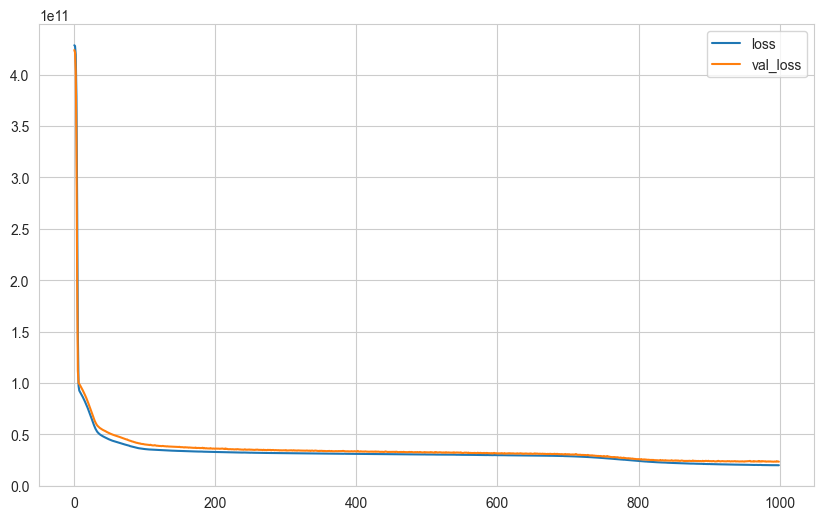

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [89]:
y_pred = model.predict(X_test)

68/68 [==============================] - 0s 3ms/step


In [90]:
eval_metric(y_test, y_pred)

r2_score: 0.8521676333834103 
mae: 82004.43989076967 
mse: 18993467269.504215 
rmse: 137816.78877953955


### EarlyStopping

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
tf.keras.utils.set_random_seed(seed) 


model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.002)


model.compile(optimizer = opt, loss = 'mse')

In [93]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [94]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 [==============================] - 3s 6ms/step - loss: 428607209472.0000 - val_loss: 423966932992.0000
Epoch 2/1000
130/130 [==============================] - 0s 3ms/step - loss: 427920916480.0000 - val_loss: 421725831168.0000
Epoch 3/1000
130/130 [==============================] - 1s 5ms/step - loss: 419527622656.0000 - val_loss: 403137527808.0000
Epoch 4/1000
130/130 [==============================] - 1s 4ms/step - loss: 379123204096.0000 - val_loss: 335301672960.0000
Epoch 5/1000
130/130 [==============================] - 1s 4ms/step - loss: 275292160000.0000 - val_loss: 204272713728.0000
Epoch 6/1000
130/130 [==============================] - 0s 4ms/step - loss: 147549601792.0000 - val_loss: 111843483648.0000
Epoch 7/1000
130/130 [==============================] - 0s 4ms/step - loss: 97283997696.0000 - val_loss: 100163756032.0000
Epoch 8/1000
130/130 [==============================] - 0s 4ms/step - loss: 92646809600.0000 - val_loss: 99083345920.0000
Epoch 9/100

130/130 [==============================] - 0s 4ms/step - loss: 41341976576.0000 - val_loss: 47034003456.0000
Epoch 68/1000
130/130 [==============================] - 0s 3ms/step - loss: 41104781312.0000 - val_loss: 46795587584.0000
Epoch 69/1000
130/130 [==============================] - 0s 3ms/step - loss: 40915271680.0000 - val_loss: 46542974976.0000
Epoch 70/1000
130/130 [==============================] - 0s 4ms/step - loss: 40704012288.0000 - val_loss: 46320803840.0000
Epoch 71/1000
130/130 [==============================] - 1s 4ms/step - loss: 40529031168.0000 - val_loss: 46160281600.0000
Epoch 72/1000
130/130 [==============================] - 1s 4ms/step - loss: 40288161792.0000 - val_loss: 45779673088.0000
Epoch 73/1000
130/130 [==============================] - 1s 4ms/step - loss: 40076247040.0000 - val_loss: 45556875264.0000
Epoch 74/1000
130/130 [==============================] - 1s 5ms/step - loss: 39881752576.0000 - val_loss: 45318733824.0000
Epoch 75/1000
130/130 [=======

130/130 [==============================] - 1s 4ms/step - loss: 34352097280.0000 - val_loss: 38399635456.0000
Epoch 134/1000
130/130 [==============================] - 1s 4ms/step - loss: 34378493952.0000 - val_loss: 38238531584.0000
Epoch 135/1000
130/130 [==============================] - 1s 4ms/step - loss: 34290659328.0000 - val_loss: 38204616704.0000
Epoch 136/1000
130/130 [==============================] - 1s 4ms/step - loss: 34242594816.0000 - val_loss: 38070075392.0000
Epoch 137/1000
130/130 [==============================] - 1s 4ms/step - loss: 34236768256.0000 - val_loss: 38116286464.0000
Epoch 138/1000
130/130 [==============================] - 1s 4ms/step - loss: 34194155520.0000 - val_loss: 38177853440.0000
Epoch 139/1000
130/130 [==============================] - 1s 4ms/step - loss: 34182680576.0000 - val_loss: 37991890944.0000
Epoch 140/1000
130/130 [==============================] - 1s 4ms/step - loss: 34143023104.0000 - val_loss: 37973917696.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 32953004032.0000 - val_loss: 36174417920.0000
Epoch 200/1000
130/130 [==============================] - 0s 4ms/step - loss: 32902148096.0000 - val_loss: 36062023680.0000
Epoch 201/1000
130/130 [==============================] - 1s 4ms/step - loss: 32931852288.0000 - val_loss: 36208545792.0000
Epoch 202/1000
130/130 [==============================] - 1s 4ms/step - loss: 32872605696.0000 - val_loss: 36158615552.0000
Epoch 203/1000
130/130 [==============================] - 1s 4ms/step - loss: 32843966464.0000 - val_loss: 36020338688.0000
Epoch 204/1000
130/130 [==============================] - 1s 4ms/step - loss: 32823848960.0000 - val_loss: 36117692416.0000
Epoch 205/1000
130/130 [==============================] - 1s 4ms/step - loss: 32821999616.0000 - val_loss: 36134940672.0000
Epoch 206/1000
130/130 [==============================] - 1s 4ms/step - loss: 32804417536.0000 - val_loss: 36133191680.0000
Epoch 207/1000
130/130 

130/130 [==============================] - 1s 5ms/step - loss: 32005189632.0000 - val_loss: 34824355840.0000
Epoch 266/1000
130/130 [==============================] - 0s 3ms/step - loss: 32002701312.0000 - val_loss: 34831196160.0000
Epoch 267/1000
130/130 [==============================] - 0s 3ms/step - loss: 32017553408.0000 - val_loss: 34906865664.0000
Epoch 268/1000
130/130 [==============================] - 1s 4ms/step - loss: 31989792768.0000 - val_loss: 34655289344.0000
Epoch 269/1000
130/130 [==============================] - 0s 3ms/step - loss: 31977709568.0000 - val_loss: 35034447872.0000
Epoch 270/1000
130/130 [==============================] - 0s 3ms/step - loss: 31991777280.0000 - val_loss: 34929483776.0000
Epoch 271/1000
130/130 [==============================] - 0s 3ms/step - loss: 31946887168.0000 - val_loss: 34686455808.0000
Epoch 272/1000
130/130 [==============================] - 1s 4ms/step - loss: 31964196864.0000 - val_loss: 34862141440.0000
Epoch 273/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 31490027520.0000 - val_loss: 34304614400.0000
Epoch 332/1000
130/130 [==============================] - 1s 4ms/step - loss: 31492474880.0000 - val_loss: 34125772800.0000
Epoch 333/1000
130/130 [==============================] - 1s 4ms/step - loss: 31489361920.0000 - val_loss: 34094161920.0000
Epoch 334/1000
130/130 [==============================] - 1s 4ms/step - loss: 31478507520.0000 - val_loss: 34104760320.0000
Epoch 335/1000
130/130 [==============================] - 1s 4ms/step - loss: 31460470784.0000 - val_loss: 34216122368.0000
Epoch 336/1000
130/130 [==============================] - 1s 6ms/step - loss: 31437979648.0000 - val_loss: 33894283264.0000
Epoch 337/1000
130/130 [==============================] - 1s 7ms/step - loss: 31473711104.0000 - val_loss: 34091354112.0000
Epoch 338/1000
130/130 [==============================] - 2s 12ms/step - loss: 31418583040.0000 - val_loss: 34283470848.0000
Epoch 339/1000
130/130

130/130 [==============================] - 0s 3ms/step - loss: 31034570752.0000 - val_loss: 33508870144.0000
Epoch 398/1000
130/130 [==============================] - 1s 4ms/step - loss: 31045822464.0000 - val_loss: 33512865792.0000
Epoch 399/1000
130/130 [==============================] - 0s 3ms/step - loss: 31072184320.0000 - val_loss: 33639092224.0000
Epoch 400/1000
130/130 [==============================] - 0s 3ms/step - loss: 31079669760.0000 - val_loss: 33430771712.0000
Epoch 401/1000
130/130 [==============================] - 0s 3ms/step - loss: 31029393408.0000 - val_loss: 33422397440.0000
Epoch 402/1000
130/130 [==============================] - 1s 5ms/step - loss: 31021938688.0000 - val_loss: 33364350976.0000
Epoch 403/1000
130/130 [==============================] - 1s 4ms/step - loss: 30991849472.0000 - val_loss: 33931526144.0000
Epoch 404/1000
130/130 [==============================] - 1s 4ms/step - loss: 31022583808.0000 - val_loss: 33389436928.0000
Epoch 405/1000
130/130 

130/130 [==============================] - 1s 5ms/step - loss: 30652239872.0000 - val_loss: 32876361728.0000
Epoch 464/1000
130/130 [==============================] - 1s 4ms/step - loss: 30620882944.0000 - val_loss: 32913813504.0000
Epoch 465/1000
130/130 [==============================] - 1s 4ms/step - loss: 30626910208.0000 - val_loss: 32912781312.0000
Epoch 466/1000
130/130 [==============================] - 1s 4ms/step - loss: 30615638016.0000 - val_loss: 32709068800.0000
Epoch 467/1000
130/130 [==============================] - 1s 4ms/step - loss: 30634928128.0000 - val_loss: 32915165184.0000
Epoch 468/1000
130/130 [==============================] - 1s 4ms/step - loss: 30611564544.0000 - val_loss: 33038454784.0000
Epoch 469/1000
130/130 [==============================] - 1s 4ms/step - loss: 30627809280.0000 - val_loss: 32735541248.0000
Epoch 470/1000
130/130 [==============================] - 1s 4ms/step - loss: 30592423936.0000 - val_loss: 32829188096.0000
Epoch 471/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 30253398016.0000 - val_loss: 32339965952.0000
Epoch 530/1000
130/130 [==============================] - 1s 4ms/step - loss: 30248396800.0000 - val_loss: 32379459584.0000
Epoch 531/1000
130/130 [==============================] - 0s 4ms/step - loss: 30244157440.0000 - val_loss: 32270176256.0000
Epoch 532/1000
130/130 [==============================] - 1s 4ms/step - loss: 30229747712.0000 - val_loss: 32480296960.0000
Epoch 533/1000
130/130 [==============================] - 1s 4ms/step - loss: 30244550656.0000 - val_loss: 32289605632.0000
Epoch 534/1000
130/130 [==============================] - 1s 4ms/step - loss: 30221004800.0000 - val_loss: 32216489984.0000
Epoch 535/1000
130/130 [==============================] - 1s 4ms/step - loss: 30223769600.0000 - val_loss: 32334735360.0000
Epoch 536/1000
130/130 [==============================] - 1s 6ms/step - loss: 30231121920.0000 - val_loss: 32188489728.0000
Epoch 537/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 29826983936.0000 - val_loss: 31547949056.0000
Epoch 596/1000
130/130 [==============================] - 1s 4ms/step - loss: 29789052928.0000 - val_loss: 31996334080.0000
Epoch 597/1000
130/130 [==============================] - 1s 4ms/step - loss: 29856241664.0000 - val_loss: 31779119104.0000
Epoch 598/1000
130/130 [==============================] - 1s 4ms/step - loss: 29812461568.0000 - val_loss: 31610064896.0000
Epoch 599/1000
130/130 [==============================] - 1s 5ms/step - loss: 29777532928.0000 - val_loss: 31678271488.0000
Epoch 600/1000
130/130 [==============================] - 1s 4ms/step - loss: 29785346048.0000 - val_loss: 31630182400.0000
Epoch 601/1000
130/130 [==============================] - 1s 4ms/step - loss: 29765376000.0000 - val_loss: 31619047424.0000
Epoch 602/1000
130/130 [==============================] - 1s 4ms/step - loss: 29768603648.0000 - val_loss: 31438405632.0000
Epoch 603/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 29348986880.0000 - val_loss: 31254988800.0000
Epoch 662/1000
130/130 [==============================] - 1s 5ms/step - loss: 29344921600.0000 - val_loss: 31110406144.0000
Epoch 663/1000
130/130 [==============================] - 1s 5ms/step - loss: 29318979584.0000 - val_loss: 31059437568.0000
Epoch 664/1000
130/130 [==============================] - 1s 5ms/step - loss: 29314863104.0000 - val_loss: 31046238208.0000
Epoch 665/1000
130/130 [==============================] - 1s 6ms/step - loss: 29280747520.0000 - val_loss: 31230615552.0000
Epoch 666/1000
130/130 [==============================] - 1s 5ms/step - loss: 29340114944.0000 - val_loss: 31061442560.0000
Epoch 667/1000
130/130 [==============================] - 1s 5ms/step - loss: 29302728704.0000 - val_loss: 30937352192.0000
Epoch 668/1000
130/130 [==============================] - 1s 5ms/step - loss: 29292660736.0000 - val_loss: 31114760192.0000
Epoch 669/1000
130/130 

130/130 [==============================] - 1s 6ms/step - loss: 28009181184.0000 - val_loss: 29705531392.0000
Epoch 728/1000
130/130 [==============================] - 1s 5ms/step - loss: 28003330048.0000 - val_loss: 29834829824.0000
Epoch 729/1000
130/130 [==============================] - 1s 6ms/step - loss: 27977172992.0000 - val_loss: 30008586240.0000
Epoch 730/1000
130/130 [==============================] - 1s 5ms/step - loss: 27927318528.0000 - val_loss: 29793497088.0000
Epoch 731/1000
130/130 [==============================] - 1s 4ms/step - loss: 27902785536.0000 - val_loss: 29650132992.0000
Epoch 732/1000
130/130 [==============================] - 1s 4ms/step - loss: 27859795968.0000 - val_loss: 29502371840.0000
Epoch 733/1000
130/130 [==============================] - 1s 4ms/step - loss: 27805399040.0000 - val_loss: 29549381632.0000
Epoch 734/1000
130/130 [==============================] - 1s 4ms/step - loss: 27777673216.0000 - val_loss: 29462349824.0000
Epoch 735/1000
130/130 

130/130 [==============================] - 0s 3ms/step - loss: 24671979520.0000 - val_loss: 26435782656.0000
Epoch 794/1000
130/130 [==============================] - 1s 4ms/step - loss: 24573581312.0000 - val_loss: 26151505920.0000
Epoch 795/1000
130/130 [==============================] - 0s 3ms/step - loss: 24550316032.0000 - val_loss: 26180292608.0000
Epoch 796/1000
130/130 [==============================] - 0s 3ms/step - loss: 24488693760.0000 - val_loss: 26067648512.0000
Epoch 797/1000
130/130 [==============================] - 0s 3ms/step - loss: 24384829440.0000 - val_loss: 26068963328.0000
Epoch 798/1000
130/130 [==============================] - 0s 3ms/step - loss: 24358100992.0000 - val_loss: 25900742656.0000
Epoch 799/1000
130/130 [==============================] - 0s 3ms/step - loss: 24311005184.0000 - val_loss: 25920878592.0000
Epoch 800/1000
130/130 [==============================] - 0s 3ms/step - loss: 24226560000.0000 - val_loss: 25964283904.0000
Epoch 801/1000
130/130 

130/130 [==============================] - 1s 4ms/step - loss: 21948174336.0000 - val_loss: 24235505664.0000
Epoch 860/1000
130/130 [==============================] - 1s 4ms/step - loss: 21920335872.0000 - val_loss: 24222271488.0000
Epoch 861/1000
130/130 [==============================] - 1s 4ms/step - loss: 21925724160.0000 - val_loss: 24393181184.0000
Epoch 862/1000
130/130 [==============================] - 1s 5ms/step - loss: 21901737984.0000 - val_loss: 24546813952.0000
Epoch 863/1000
130/130 [==============================] - 1s 5ms/step - loss: 21915168768.0000 - val_loss: 24464414720.0000
Epoch 864/1000
130/130 [==============================] - 1s 5ms/step - loss: 21858930688.0000 - val_loss: 24269719552.0000
Epoch 865/1000
130/130 [==============================] - 1s 4ms/step - loss: 21800607744.0000 - val_loss: 24175777792.0000
Epoch 866/1000
130/130 [==============================] - 1s 4ms/step - loss: 21793062912.0000 - val_loss: 24091809792.0000
Epoch 867/1000
130/130 

130/130 [==============================] - 1s 6ms/step - loss: 20773074944.0000 - val_loss: 23796058112.0000
Epoch 926/1000
130/130 [==============================] - 1s 7ms/step - loss: 20750151680.0000 - val_loss: 23757965312.0000
Epoch 927/1000
130/130 [==============================] - 1s 11ms/step - loss: 20738666496.0000 - val_loss: 23986647040.0000
Epoch 928/1000
130/130 [==============================] - 2s 12ms/step - loss: 20714913792.0000 - val_loss: 23848738816.0000
Epoch 929/1000
130/130 [==============================] - 1s 9ms/step - loss: 20726607872.0000 - val_loss: 23934748672.0000
Epoch 930/1000
130/130 [==============================] - 1s 7ms/step - loss: 20699570176.0000 - val_loss: 23947296768.0000
Epoch 931/1000
130/130 [==============================] - 1s 6ms/step - loss: 20665569280.0000 - val_loss: 23664766976.0000
Epoch 932/1000
130/130 [==============================] - 1s 6ms/step - loss: 20711034880.0000 - val_loss: 23676248064.0000
Epoch 933/1000
130/13

<AxesSubplot:>

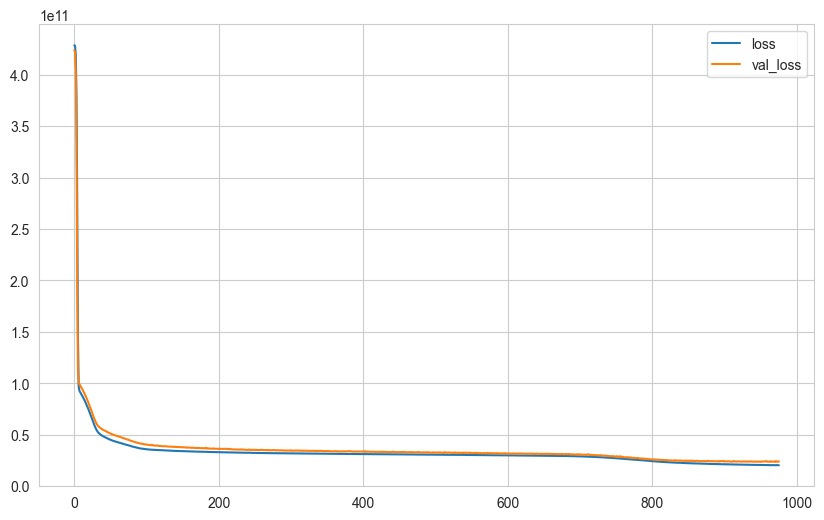

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
y_pred = model.predict(X_test)

68/68 [==============================] - 0s 2ms/step


In [97]:
eval_metric(y_test, y_pred)

r2_score: 0.8514380784479216 
mae: 81995.98742766204 
mse: 19087200313.935867 
rmse: 138156.4342111357


### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

Dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

![dropout.PNG](https://miro.medium.com/max/1400/1*nty4xtm9UBuWLqxHVaamjw.png)
[Source-1](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)
[Source-2](https://medium.com/unpackai/introduction-of-dropout-and-ensemble-model-in-the-history-of-deep-learning-a4c2a512dcca)

In [98]:
from tensorflow.keras.layers import Dropout

In [99]:
tf.keras.utils.set_random_seed(seed) 

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
 
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.002)
model.compile(optimizer = opt, loss = 'mse')

In [100]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [101]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 [==============================] - 4s 7ms/step - loss: 428607504384.0000 - val_loss: 423968440320.0000
Epoch 2/1000
130/130 [==============================] - 1s 4ms/step - loss: 427775426560.0000 - val_loss: 421120901120.0000
Epoch 3/1000
130/130 [==============================] - 1s 4ms/step - loss: 416450150400.0000 - val_loss: 395241619456.0000
Epoch 4/1000
130/130 [==============================] - 1s 5ms/step - loss: 357910511616.0000 - val_loss: 295573684224.0000
Epoch 5/1000
130/130 [==============================] - 1s 5ms/step - loss: 225692844032.0000 - val_loss: 148579352576.0000
Epoch 6/1000
130/130 [==============================] - 1s 4ms/step - loss: 136629035008.0000 - val_loss: 105084829696.0000
Epoch 7/1000
130/130 [==============================] - 1s 5ms/step - loss: 126341029888.0000 - val_loss: 101563121664.0000
Epoch 8/1000
130/130 [==============================] - 1s 7ms/step - loss: 128603029504.0000 - val_loss: 100537360384.0000
Epoch 9/

130/130 [==============================] - 1s 11ms/step - loss: 79200755712.0000 - val_loss: 50947330048.0000
Epoch 68/1000
130/130 [==============================] - 1s 7ms/step - loss: 78521835520.0000 - val_loss: 50622382080.0000
Epoch 69/1000
130/130 [==============================] - 1s 5ms/step - loss: 78915100672.0000 - val_loss: 50794532864.0000
Epoch 70/1000
130/130 [==============================] - 1s 5ms/step - loss: 78890450944.0000 - val_loss: 50362347520.0000
Epoch 71/1000
130/130 [==============================] - 1s 5ms/step - loss: 77450264576.0000 - val_loss: 50082635776.0000
Epoch 72/1000
130/130 [==============================] - 1s 5ms/step - loss: 79735431168.0000 - val_loss: 50735177728.0000
Epoch 73/1000
130/130 [==============================] - 1s 5ms/step - loss: 77886062592.0000 - val_loss: 50349875200.0000
Epoch 74/1000
130/130 [==============================] - 1s 5ms/step - loss: 80670687232.0000 - val_loss: 49381875712.0000
Epoch 75/1000
130/130 [======

130/130 [==============================] - 1s 5ms/step - loss: 74866483200.0000 - val_loss: 42702262272.0000
Epoch 134/1000
130/130 [==============================] - 1s 6ms/step - loss: 72540372992.0000 - val_loss: 42210689024.0000
Epoch 135/1000
130/130 [==============================] - 1s 6ms/step - loss: 72994488320.0000 - val_loss: 42129981440.0000
Epoch 136/1000
130/130 [==============================] - 1s 5ms/step - loss: 73581101056.0000 - val_loss: 42418642944.0000
Epoch 137/1000
130/130 [==============================] - 1s 6ms/step - loss: 70470385664.0000 - val_loss: 41866698752.0000
Epoch 138/1000
130/130 [==============================] - 1s 5ms/step - loss: 71774650368.0000 - val_loss: 40955731968.0000
Epoch 139/1000
130/130 [==============================] - 1s 5ms/step - loss: 74287177728.0000 - val_loss: 42126495744.0000
Epoch 140/1000
130/130 [==============================] - 1s 6ms/step - loss: 69343166464.0000 - val_loss: 42504253440.0000
Epoch 141/1000
130/130 

130/130 [==============================] - 1s 5ms/step - loss: 69435408384.0000 - val_loss: 39897276416.0000
Epoch 200/1000
130/130 [==============================] - 1s 4ms/step - loss: 71151394816.0000 - val_loss: 40538124288.0000
Epoch 201/1000
130/130 [==============================] - 1s 4ms/step - loss: 69800304640.0000 - val_loss: 39135490048.0000
Epoch 202/1000
130/130 [==============================] - 0s 4ms/step - loss: 68067094528.0000 - val_loss: 39443881984.0000
Epoch 203/1000
130/130 [==============================] - 1s 5ms/step - loss: 70892601344.0000 - val_loss: 39587770368.0000
Epoch 204/1000
130/130 [==============================] - 1s 4ms/step - loss: 71259152384.0000 - val_loss: 39574622208.0000
Epoch 205/1000
130/130 [==============================] - 1s 4ms/step - loss: 69986959360.0000 - val_loss: 38934020096.0000
Epoch 206/1000
130/130 [==============================] - 1s 5ms/step - loss: 68991549440.0000 - val_loss: 39765508096.0000
Epoch 207/1000
130/130 

<AxesSubplot:>

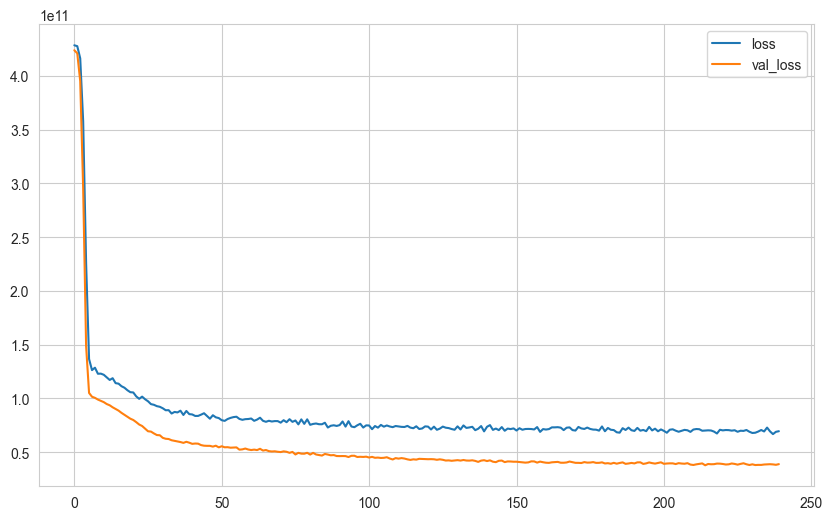

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [103]:
y_pred = model.predict(X_test)

68/68 [==============================] - 0s 2ms/step


In [104]:
eval_metric(y_test, y_pred)

r2_score: 0.7525848452176126 
mae: 109166.23971535012 
mse: 31787840186.08306 
rmse: 178291.44731613758


## Saving Final Model and Scaler

In [105]:
import pickle
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [106]:
tf.keras.utils.set_random_seed(seed) 

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.002)


model.compile(optimizer = opt, loss = 'mse')

In [107]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [108]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 1500,
         callbacks = [early_stop]
         )

Epoch 1/1500
152/152 [==============================] - 3s 6ms/step - loss: 427906334720.0000 - val_loss: 417248444416.0000
Epoch 2/1500
152/152 [==============================] - 0s 3ms/step - loss: 426216554496.0000 - val_loss: 411799224320.0000
Epoch 3/1500
152/152 [==============================] - 0s 3ms/step - loss: 406648291328.0000 - val_loss: 369849073664.0000
Epoch 4/1500
152/152 [==============================] - 0s 3ms/step - loss: 324312367104.0000 - val_loss: 244184842240.0000
Epoch 5/1500
152/152 [==============================] - 0s 3ms/step - loss: 178814631936.0000 - val_loss: 111362662400.0000
Epoch 6/1500
152/152 [==============================] - 0s 3ms/step - loss: 101552889856.0000 - val_loss: 88082006016.0000
Epoch 7/1500
152/152 [==============================] - 0s 3ms/step - loss: 93692723200.0000 - val_loss: 86473515008.0000
Epoch 8/1500
152/152 [==============================] - 0s 3ms/step - loss: 92242165760.0000 - val_loss: 85143601152.0000
Epoch 9/1500


152/152 [==============================] - 1s 6ms/step - loss: 40560173056.0000 - val_loss: 36755693568.0000
Epoch 68/1500
152/152 [==============================] - 1s 3ms/step - loss: 40382304256.0000 - val_loss: 36444504064.0000
Epoch 69/1500
152/152 [==============================] - 1s 4ms/step - loss: 40097017856.0000 - val_loss: 36239474688.0000
Epoch 70/1500
152/152 [==============================] - 0s 2ms/step - loss: 39855022080.0000 - val_loss: 36054966272.0000
Epoch 71/1500
152/152 [==============================] - 0s 3ms/step - loss: 39675535360.0000 - val_loss: 35861118976.0000
Epoch 72/1500
152/152 [==============================] - 0s 3ms/step - loss: 39449042944.0000 - val_loss: 35655856128.0000
Epoch 73/1500
152/152 [==============================] - 1s 3ms/step - loss: 39272009728.0000 - val_loss: 35489775616.0000
Epoch 74/1500
152/152 [==============================] - 1s 3ms/step - loss: 39088939008.0000 - val_loss: 35314130944.0000
Epoch 75/1500
152/152 [=======

152/152 [==============================] - 0s 2ms/step - loss: 34215151616.0000 - val_loss: 30196238336.0000
Epoch 134/1500
152/152 [==============================] - 0s 3ms/step - loss: 34184220672.0000 - val_loss: 30111002624.0000
Epoch 135/1500
152/152 [==============================] - 0s 3ms/step - loss: 34210676736.0000 - val_loss: 30063161344.0000
Epoch 136/1500
152/152 [==============================] - 1s 4ms/step - loss: 34080122880.0000 - val_loss: 30064099328.0000
Epoch 137/1500
152/152 [==============================] - 1s 4ms/step - loss: 34091948032.0000 - val_loss: 29980334080.0000
Epoch 138/1500
152/152 [==============================] - 0s 3ms/step - loss: 34036019200.0000 - val_loss: 29968123904.0000
Epoch 139/1500
152/152 [==============================] - 1s 3ms/step - loss: 33980440576.0000 - val_loss: 29904439296.0000
Epoch 140/1500
152/152 [==============================] - 1s 4ms/step - loss: 33951111168.0000 - val_loss: 29843167232.0000
Epoch 141/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 32651663360.0000 - val_loss: 28319260672.0000
Epoch 200/1500
152/152 [==============================] - 1s 4ms/step - loss: 32630284288.0000 - val_loss: 28233379840.0000
Epoch 201/1500
152/152 [==============================] - 1s 4ms/step - loss: 32637634560.0000 - val_loss: 28247242752.0000
Epoch 202/1500
152/152 [==============================] - 1s 4ms/step - loss: 32604583936.0000 - val_loss: 28284608512.0000
Epoch 203/1500
152/152 [==============================] - 1s 4ms/step - loss: 32600657920.0000 - val_loss: 28249677824.0000
Epoch 204/1500
152/152 [==============================] - 0s 3ms/step - loss: 32574869504.0000 - val_loss: 28179576832.0000
Epoch 205/1500
152/152 [==============================] - 1s 4ms/step - loss: 32545005568.0000 - val_loss: 28296396800.0000
Epoch 206/1500
152/152 [==============================] - 1s 3ms/step - loss: 32555415552.0000 - val_loss: 28185643008.0000
Epoch 207/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 31826022400.0000 - val_loss: 27433259008.0000
Epoch 266/1500
152/152 [==============================] - 1s 4ms/step - loss: 31851124736.0000 - val_loss: 27426084864.0000
Epoch 267/1500
152/152 [==============================] - 1s 4ms/step - loss: 31810707456.0000 - val_loss: 27435204608.0000
Epoch 268/1500
152/152 [==============================] - 1s 4ms/step - loss: 31804692480.0000 - val_loss: 27424561152.0000
Epoch 269/1500
152/152 [==============================] - 1s 4ms/step - loss: 31832244224.0000 - val_loss: 27393538048.0000
Epoch 270/1500
152/152 [==============================] - 1s 4ms/step - loss: 31784112128.0000 - val_loss: 27472261120.0000
Epoch 271/1500
152/152 [==============================] - 1s 4ms/step - loss: 31819831296.0000 - val_loss: 27392669696.0000
Epoch 272/1500
152/152 [==============================] - 1s 4ms/step - loss: 31762143232.0000 - val_loss: 27419054080.0000
Epoch 273/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 31197468672.0000 - val_loss: 26856794112.0000
Epoch 332/1500
152/152 [==============================] - 1s 4ms/step - loss: 31254396928.0000 - val_loss: 26845253632.0000
Epoch 333/1500
152/152 [==============================] - 1s 4ms/step - loss: 31176603648.0000 - val_loss: 26875631616.0000
Epoch 334/1500
152/152 [==============================] - 1s 4ms/step - loss: 31223371776.0000 - val_loss: 26872791040.0000
Epoch 335/1500
152/152 [==============================] - 1s 4ms/step - loss: 31223984128.0000 - val_loss: 26840766464.0000
Epoch 336/1500
152/152 [==============================] - 1s 4ms/step - loss: 31190290432.0000 - val_loss: 26836066304.0000
Epoch 337/1500
152/152 [==============================] - 1s 4ms/step - loss: 31187705856.0000 - val_loss: 26842064896.0000
Epoch 338/1500
152/152 [==============================] - 1s 4ms/step - loss: 31165227008.0000 - val_loss: 26810165248.0000
Epoch 339/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 30770452480.0000 - val_loss: 26473875456.0000
Epoch 398/1500
152/152 [==============================] - 1s 4ms/step - loss: 30757105664.0000 - val_loss: 26521278464.0000
Epoch 399/1500
152/152 [==============================] - 1s 4ms/step - loss: 30754973696.0000 - val_loss: 26466091008.0000
Epoch 400/1500
152/152 [==============================] - 1s 4ms/step - loss: 30711330816.0000 - val_loss: 26487994368.0000
Epoch 401/1500
152/152 [==============================] - 1s 4ms/step - loss: 30714880000.0000 - val_loss: 26459959296.0000
Epoch 402/1500
152/152 [==============================] - 1s 3ms/step - loss: 30754650112.0000 - val_loss: 26458843136.0000
Epoch 403/1500
152/152 [==============================] - 1s 4ms/step - loss: 30718836736.0000 - val_loss: 26448687104.0000
Epoch 404/1500
152/152 [==============================] - 1s 4ms/step - loss: 30687006720.0000 - val_loss: 26434576384.0000
Epoch 405/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 30321836032.0000 - val_loss: 26146861056.0000
Epoch 464/1500
152/152 [==============================] - 1s 4ms/step - loss: 30331475968.0000 - val_loss: 26138742784.0000
Epoch 465/1500
152/152 [==============================] - 1s 4ms/step - loss: 30329507840.0000 - val_loss: 26125027328.0000
Epoch 466/1500
152/152 [==============================] - 1s 4ms/step - loss: 30317666304.0000 - val_loss: 26144686080.0000
Epoch 467/1500
152/152 [==============================] - 1s 4ms/step - loss: 30292715520.0000 - val_loss: 26127147008.0000
Epoch 468/1500
152/152 [==============================] - 1s 4ms/step - loss: 30289025024.0000 - val_loss: 26105298944.0000
Epoch 469/1500
152/152 [==============================] - 1s 4ms/step - loss: 30299844608.0000 - val_loss: 26100080640.0000
Epoch 470/1500
152/152 [==============================] - 1s 4ms/step - loss: 30260152320.0000 - val_loss: 26140422144.0000
Epoch 471/1500
152/152 

152/152 [==============================] - 0s 3ms/step - loss: 29915164672.0000 - val_loss: 25855735808.0000
Epoch 530/1500
152/152 [==============================] - 1s 4ms/step - loss: 29904640000.0000 - val_loss: 25827530752.0000
Epoch 531/1500
152/152 [==============================] - 1s 4ms/step - loss: 29892100096.0000 - val_loss: 25826281472.0000
Epoch 532/1500
152/152 [==============================] - 1s 4ms/step - loss: 29838491648.0000 - val_loss: 25823064064.0000
Epoch 533/1500
152/152 [==============================] - 1s 4ms/step - loss: 29841035264.0000 - val_loss: 25798696960.0000
Epoch 534/1500
152/152 [==============================] - 1s 4ms/step - loss: 29861556224.0000 - val_loss: 25778233344.0000
Epoch 535/1500
152/152 [==============================] - 1s 4ms/step - loss: 29889961984.0000 - val_loss: 25793820672.0000
Epoch 536/1500
152/152 [==============================] - 1s 4ms/step - loss: 29868136448.0000 - val_loss: 25833338880.0000
Epoch 537/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 29472188416.0000 - val_loss: 25500907520.0000
Epoch 596/1500
152/152 [==============================] - 1s 4ms/step - loss: 29453805568.0000 - val_loss: 25482381312.0000
Epoch 597/1500
152/152 [==============================] - 1s 3ms/step - loss: 29442619392.0000 - val_loss: 25512333312.0000
Epoch 598/1500
152/152 [==============================] - 1s 3ms/step - loss: 29439039488.0000 - val_loss: 25465778176.0000
Epoch 599/1500
152/152 [==============================] - 1s 4ms/step - loss: 29404141568.0000 - val_loss: 25473650688.0000
Epoch 600/1500
152/152 [==============================] - 1s 4ms/step - loss: 29407866880.0000 - val_loss: 25480435712.0000
Epoch 601/1500
152/152 [==============================] - 1s 4ms/step - loss: 29394970624.0000 - val_loss: 25461710848.0000
Epoch 602/1500
152/152 [==============================] - 1s 4ms/step - loss: 29402550272.0000 - val_loss: 25454200832.0000
Epoch 603/1500
152/152 

152/152 [==============================] - 1s 7ms/step - loss: 29073813504.0000 - val_loss: 25226842112.0000
Epoch 662/1500
152/152 [==============================] - 1s 4ms/step - loss: 29021739008.0000 - val_loss: 25147578368.0000
Epoch 663/1500
152/152 [==============================] - 1s 4ms/step - loss: 29054175232.0000 - val_loss: 25104932864.0000
Epoch 664/1500
152/152 [==============================] - 1s 4ms/step - loss: 29020258304.0000 - val_loss: 25091094528.0000
Epoch 665/1500
152/152 [==============================] - 1s 4ms/step - loss: 29025871872.0000 - val_loss: 25090385920.0000
Epoch 666/1500
152/152 [==============================] - 1s 4ms/step - loss: 29013886976.0000 - val_loss: 25106542592.0000
Epoch 667/1500
152/152 [==============================] - 1s 4ms/step - loss: 29016766464.0000 - val_loss: 25141368832.0000
Epoch 668/1500
152/152 [==============================] - 1s 4ms/step - loss: 28989251584.0000 - val_loss: 25077927936.0000
Epoch 669/1500
152/152 

152/152 [==============================] - 0s 3ms/step - loss: 28656951296.0000 - val_loss: 24815212544.0000
Epoch 728/1500
152/152 [==============================] - 0s 3ms/step - loss: 28685875200.0000 - val_loss: 24736718848.0000
Epoch 729/1500
152/152 [==============================] - 1s 3ms/step - loss: 28660959232.0000 - val_loss: 24734140416.0000
Epoch 730/1500
152/152 [==============================] - 0s 3ms/step - loss: 28656396288.0000 - val_loss: 24738193408.0000
Epoch 731/1500
152/152 [==============================] - 0s 3ms/step - loss: 28721070080.0000 - val_loss: 24720447488.0000
Epoch 732/1500
152/152 [==============================] - 1s 4ms/step - loss: 28682500096.0000 - val_loss: 24712085504.0000
Epoch 733/1500
152/152 [==============================] - 1s 4ms/step - loss: 28653225984.0000 - val_loss: 24714539008.0000
Epoch 734/1500
152/152 [==============================] - 1s 4ms/step - loss: 28658571264.0000 - val_loss: 24793606144.0000
Epoch 735/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 28337504256.0000 - val_loss: 24349198336.0000
Epoch 794/1500
152/152 [==============================] - 1s 4ms/step - loss: 28313317376.0000 - val_loss: 24384428032.0000
Epoch 795/1500
152/152 [==============================] - 1s 4ms/step - loss: 28336457728.0000 - val_loss: 24317091840.0000
Epoch 796/1500
152/152 [==============================] - 1s 4ms/step - loss: 28311916544.0000 - val_loss: 24355411968.0000
Epoch 797/1500
152/152 [==============================] - 1s 4ms/step - loss: 28332310528.0000 - val_loss: 24306638848.0000
Epoch 798/1500
152/152 [==============================] - 1s 4ms/step - loss: 28387971072.0000 - val_loss: 24309794816.0000
Epoch 799/1500
152/152 [==============================] - 1s 4ms/step - loss: 28313931776.0000 - val_loss: 24292458496.0000
Epoch 800/1500
152/152 [==============================] - 1s 4ms/step - loss: 28304521216.0000 - val_loss: 24280004608.0000
Epoch 801/1500
152/152 

152/152 [==============================] - 1s 3ms/step - loss: 27352307712.0000 - val_loss: 23364902912.0000
Epoch 860/1500
152/152 [==============================] - 1s 3ms/step - loss: 27326451712.0000 - val_loss: 23345958912.0000
Epoch 861/1500
152/152 [==============================] - 1s 4ms/step - loss: 27266377728.0000 - val_loss: 23319652352.0000
Epoch 862/1500
152/152 [==============================] - 1s 4ms/step - loss: 27307055104.0000 - val_loss: 23353749504.0000
Epoch 863/1500
152/152 [==============================] - 1s 4ms/step - loss: 27245049856.0000 - val_loss: 23275687936.0000
Epoch 864/1500
152/152 [==============================] - 1s 4ms/step - loss: 27159840768.0000 - val_loss: 23340103680.0000
Epoch 865/1500
152/152 [==============================] - 1s 4ms/step - loss: 27176148992.0000 - val_loss: 23306551296.0000
Epoch 866/1500
152/152 [==============================] - 1s 4ms/step - loss: 27153539072.0000 - val_loss: 23221362688.0000
Epoch 867/1500
152/152 

152/152 [==============================] - 1s 4ms/step - loss: 24490055680.0000 - val_loss: 20792815616.0000
Epoch 926/1500
152/152 [==============================] - 1s 4ms/step - loss: 24408479744.0000 - val_loss: 20749541376.0000
Epoch 927/1500
152/152 [==============================] - 1s 4ms/step - loss: 24383578112.0000 - val_loss: 20742963200.0000
Epoch 928/1500
152/152 [==============================] - 1s 4ms/step - loss: 24304009216.0000 - val_loss: 20656179200.0000
Epoch 929/1500
152/152 [==============================] - 1s 4ms/step - loss: 24267292672.0000 - val_loss: 20621490176.0000
Epoch 930/1500
152/152 [==============================] - 1s 4ms/step - loss: 24225626112.0000 - val_loss: 20604436480.0000
Epoch 931/1500
152/152 [==============================] - 1s 4ms/step - loss: 24175470592.0000 - val_loss: 20519413760.0000
Epoch 932/1500
152/152 [==============================] - 1s 4ms/step - loss: 24118943744.0000 - val_loss: 20498935808.0000
Epoch 933/1500
152/152 

152/152 [==============================] - 0s 3ms/step - loss: 21868793856.0000 - val_loss: 18697732096.0000
Epoch 992/1500
152/152 [==============================] - 1s 4ms/step - loss: 21842049024.0000 - val_loss: 18688673792.0000
Epoch 993/1500
152/152 [==============================] - 1s 4ms/step - loss: 21843525632.0000 - val_loss: 18656251904.0000
Epoch 994/1500
152/152 [==============================] - 1s 4ms/step - loss: 21806651392.0000 - val_loss: 18615226368.0000
Epoch 995/1500
152/152 [==============================] - 1s 4ms/step - loss: 21743241216.0000 - val_loss: 18652237824.0000
Epoch 996/1500
152/152 [==============================] - 1s 4ms/step - loss: 21763614720.0000 - val_loss: 18608971776.0000
Epoch 997/1500
152/152 [==============================] - 1s 4ms/step - loss: 21721339904.0000 - val_loss: 18608687104.0000
Epoch 998/1500
152/152 [==============================] - 1s 4ms/step - loss: 21714597888.0000 - val_loss: 18586017792.0000
Epoch 999/1500
152/152 

Epoch 1057/1500
152/152 [==============================] - 1s 4ms/step - loss: 20193263616.0000 - val_loss: 17501917184.0000
Epoch 1058/1500
152/152 [==============================] - 1s 4ms/step - loss: 20127277056.0000 - val_loss: 17432985600.0000
Epoch 1059/1500
152/152 [==============================] - 1s 4ms/step - loss: 20166944768.0000 - val_loss: 17408432128.0000
Epoch 1060/1500
152/152 [==============================] - 0s 3ms/step - loss: 20134356992.0000 - val_loss: 17473239040.0000
Epoch 1061/1500
152/152 [==============================] - 1s 4ms/step - loss: 20080924672.0000 - val_loss: 17363642368.0000
Epoch 1062/1500
152/152 [==============================] - 1s 3ms/step - loss: 20069584896.0000 - val_loss: 17379497984.0000
Epoch 1063/1500
152/152 [==============================] - 0s 3ms/step - loss: 20055318528.0000 - val_loss: 17462253568.0000
Epoch 1064/1500
152/152 [==============================] - 0s 3ms/step - loss: 20030955520.0000 - val_loss: 17568897024.0000


152/152 [==============================] - 1s 7ms/step - loss: 19206297600.0000 - val_loss: 16882518016.0000
Epoch 1123/1500
152/152 [==============================] - 1s 4ms/step - loss: 19218497536.0000 - val_loss: 16880506880.0000
Epoch 1124/1500
152/152 [==============================] - 1s 4ms/step - loss: 19211794432.0000 - val_loss: 16845534208.0000
Epoch 1125/1500
152/152 [==============================] - 1s 4ms/step - loss: 19192649728.0000 - val_loss: 16871692288.0000
Epoch 1126/1500
152/152 [==============================] - 1s 4ms/step - loss: 19197550592.0000 - val_loss: 16892652544.0000
Epoch 1127/1500
152/152 [==============================] - 1s 4ms/step - loss: 19154415616.0000 - val_loss: 17093563392.0000
Epoch 1128/1500
152/152 [==============================] - 1s 4ms/step - loss: 19140507648.0000 - val_loss: 16812898304.0000
Epoch 1129/1500
152/152 [==============================] - 1s 4ms/step - loss: 19182544896.0000 - val_loss: 16792311808.0000
Epoch 1130/1500


152/152 [==============================] - 1s 4ms/step - loss: 18500933632.0000 - val_loss: 16341097472.0000
Epoch 1188/1500
152/152 [==============================] - 1s 4ms/step - loss: 18604560384.0000 - val_loss: 16535775232.0000
Epoch 1189/1500
152/152 [==============================] - 1s 4ms/step - loss: 18466957312.0000 - val_loss: 16272889856.0000
Epoch 1190/1500
152/152 [==============================] - 1s 4ms/step - loss: 18488451072.0000 - val_loss: 16394308608.0000
Epoch 1191/1500
152/152 [==============================] - 0s 3ms/step - loss: 18517794816.0000 - val_loss: 16295668736.0000
Epoch 1192/1500
152/152 [==============================] - 1s 4ms/step - loss: 18459443200.0000 - val_loss: 16283964416.0000
Epoch 1193/1500
152/152 [==============================] - 1s 3ms/step - loss: 18437920768.0000 - val_loss: 16323392512.0000
Epoch 1194/1500
152/152 [==============================] - 0s 3ms/step - loss: 18447779840.0000 - val_loss: 16265719808.0000
Epoch 1195/1500


152/152 [==============================] - 0s 3ms/step - loss: 17888094208.0000 - val_loss: 15746563072.0000
Epoch 1253/1500
152/152 [==============================] - 0s 3ms/step - loss: 17911304192.0000 - val_loss: 15721593856.0000
Epoch 1254/1500
152/152 [==============================] - 0s 3ms/step - loss: 17900173312.0000 - val_loss: 15726015488.0000
Epoch 1255/1500
152/152 [==============================] - 0s 3ms/step - loss: 17818269696.0000 - val_loss: 15796770816.0000
Epoch 1256/1500
152/152 [==============================] - 1s 4ms/step - loss: 17882527744.0000 - val_loss: 15838525440.0000
Epoch 1257/1500
152/152 [==============================] - 1s 4ms/step - loss: 17885046784.0000 - val_loss: 15762075648.0000
Epoch 1258/1500
152/152 [==============================] - 1s 4ms/step - loss: 17839695872.0000 - val_loss: 15734812672.0000
Epoch 1259/1500
152/152 [==============================] - 1s 4ms/step - loss: 17841371136.0000 - val_loss: 15715636224.0000
Epoch 1260/1500


152/152 [==============================] - 1s 4ms/step - loss: 17337917440.0000 - val_loss: 15237829632.0000
Epoch 1318/1500
152/152 [==============================] - 1s 4ms/step - loss: 17327319040.0000 - val_loss: 15300894720.0000
Epoch 1319/1500
152/152 [==============================] - 1s 4ms/step - loss: 17326635008.0000 - val_loss: 15225774080.0000
Epoch 1320/1500
152/152 [==============================] - 1s 4ms/step - loss: 17304201216.0000 - val_loss: 15238382592.0000
Epoch 1321/1500
152/152 [==============================] - 1s 4ms/step - loss: 17280114688.0000 - val_loss: 15258075136.0000
Epoch 1322/1500
152/152 [==============================] - 0s 3ms/step - loss: 17266153472.0000 - val_loss: 15182262272.0000
Epoch 1323/1500
152/152 [==============================] - 1s 4ms/step - loss: 17278375936.0000 - val_loss: 15320469504.0000
Epoch 1324/1500
152/152 [==============================] - 1s 3ms/step - loss: 17314019328.0000 - val_loss: 15253632000.0000
Epoch 1325/1500


152/152 [==============================] - 0s 3ms/step - loss: 16764699648.0000 - val_loss: 14781067264.0000
Epoch 1383/1500
152/152 [==============================] - 0s 3ms/step - loss: 16757778432.0000 - val_loss: 14766487552.0000
Epoch 1384/1500
152/152 [==============================] - 0s 3ms/step - loss: 16777012224.0000 - val_loss: 14786166784.0000
Epoch 1385/1500
152/152 [==============================] - 0s 3ms/step - loss: 16750099456.0000 - val_loss: 14835508224.0000
Epoch 1386/1500
152/152 [==============================] - 0s 3ms/step - loss: 16715213824.0000 - val_loss: 14842333184.0000
Epoch 1387/1500
152/152 [==============================] - 1s 3ms/step - loss: 16690755584.0000 - val_loss: 14715303936.0000
Epoch 1388/1500
152/152 [==============================] - 1s 4ms/step - loss: 16691291136.0000 - val_loss: 14734826496.0000
Epoch 1389/1500
152/152 [==============================] - 1s 4ms/step - loss: 16724452352.0000 - val_loss: 14724400128.0000
Epoch 1390/1500


152/152 [==============================] - 1s 4ms/step - loss: 16240163840.0000 - val_loss: 14411363328.0000
Epoch 1448/1500
152/152 [==============================] - 1s 4ms/step - loss: 16230468608.0000 - val_loss: 14325983232.0000
Epoch 1449/1500
152/152 [==============================] - 1s 4ms/step - loss: 16180859904.0000 - val_loss: 14382745600.0000
Epoch 1450/1500
152/152 [==============================] - 1s 4ms/step - loss: 16249918464.0000 - val_loss: 14331841536.0000
Epoch 1451/1500
152/152 [==============================] - 1s 4ms/step - loss: 16184189952.0000 - val_loss: 14373314560.0000
Epoch 1452/1500
152/152 [==============================] - 1s 4ms/step - loss: 16180854784.0000 - val_loss: 14328051712.0000
Epoch 1453/1500
152/152 [==============================] - 0s 3ms/step - loss: 16127394816.0000 - val_loss: 14383210496.0000
Epoch 1454/1500
152/152 [==============================] - 1s 4ms/step - loss: 16097481728.0000 - val_loss: 14570440704.0000
Epoch 1455/1500


<AxesSubplot:>

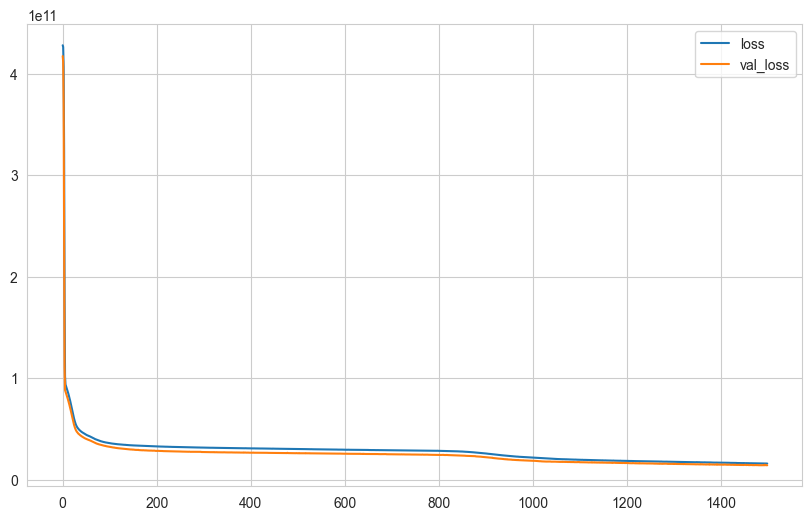

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [110]:
y_pred = model.predict(X_test)

68/68 [==============================] - 0s 3ms/step


In [111]:
eval_metric(y_test, y_pred)

r2_score: 0.8905592765091425 
mae: 75053.2326099537 
mse: 14060918100.334307 
rmse: 118578.74219409778


In [112]:
model.save('model_kc_house.h5')  # creates a HDF5 file 'my_model.h5'

## Loading Model and Scaler

In [113]:
from tensorflow.keras.models import load_model

In [114]:
model_kc_house = load_model('model_kc_house.h5')
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

## Prediction

In [115]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,built|renovated
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,47.511,-122.257,1340,5650,1955.000


In [116]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.00307611, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.57149751, 0.21760797, 0.15304348, 0.00573322,
        0.47826087]])

In [117]:
model_kc_house.predict(single_house)

1/1 [==============================] - 0s 125ms/step


array([[279275.9]], dtype=float32)

In [118]:
df.iloc[0][0]

221900.0

## Comparison with ML

### Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression 

In [120]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.7054431219005435 
mae: 124715.14810190455 
mse: 37844597575.16687 
rmse: 194536.87973021175


### Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
rf_model = RandomForestRegressor(random_state = seed)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.8912532816836695 
mae: 64653.2709236993 
mse: 13971752480.727938 
rmse: 118202.16783429963


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___